# Classifiez automatiquement des biens de consommation
 1ere partie : EDA NLP manuel  - CountVectorizer et TF-IDF
Mission
Ta mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article.

Tu dois analyser le jeu de données en réalisant un prétraitement des descriptions des produits et des images, une réduction de dimension, puis un clustering. Les résultats de la réduction de dimension et du clustering seront à présenter sous la forme de graphiques en deux dimensions, et confirmés par un calcul de similarité entre les catégories réelles et les clusters. Ces résultats illustreront le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

Pourrais-tu nous démontrer, par cette approche de modélisation, la faisabilité de regrouper automatiquement des produits de même catégorie ?

Voici les contraintes : 

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
une approche de type word/sentence embedding avec BERT ;
une approche de type word/sentence embedding avec USE (Universal Sentence Encoder). 

# Import

In [1]:
import os, sys, time, random
import pandas as pd
import numpy as np

import os
import random
import re #Opération de base sur les expressions rationnelles
import string

#NLP
import nltk
from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, wordpunct_tokenize
#from nltk import clean_html
# Lemmatizer (base d'un mot)
from nltk import chunk 
from nltk.corpus import words
from nltk.corpus import stopwords

from nltk.stem import *
from nltk.stem import PorterStemmer
from nltk.util import clean_html


#Viz - Représentation graphique
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

#Exécuter le code sur plusieurs CPU pour gagener du temps
from pandarallel import pandarallel

import re

from sklearn import preprocessing

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, pairwise
from sklearn.metrics.pairwise import distance_metrics

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

from sklearn import preprocessing, decomposition, manifold, metrics, datasets, cluster
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import adjusted_rand_score

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.feature_extraction.text import CountVectorizer

#nltk.download("stopwords")
#nltk.download("punkt")
#!pip install gtts

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

In [2]:
from P6_NLP_functions import *
#Relancer le noyau Anaconda qd on crée la fct pour la 1ere fois

In [3]:
#Initialiser pandarallel pour travailler sur 6 CPU
pandarallel.initialize(progress_bar=True, 
                       nb_workers=6
                      # verbose=1
                      )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


Setting pandas display and matplotlib options.

# to show more cells while displaying pandas dataframe
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

# to set the figures background to white
plt.rcParams['figure.facecolor']='w'

To play audio text-to-speech during execution.

Graphic and option

In [4]:
sns.set()

## Session du 18/01
Suivre les cours en français et en aglais (Ressources)
1ere partie : les textes
Extraire les catégories et les analyser

Données des produits
Image + description textuelle de chq produit

Colonne intéressante : catégorie de produit + sous catégorie (Ex: Electroménager + cuisine - cuisson 
Analyser les catégories de produits et les sous catégories de produit

1er niveau de catégories : combien de catégries et nb produit par catégorie
Idem pour la 2e catégore : nb Catégries + répartition

On se rend compte que le niveau 1 est le plus intéressant 

Les catégoires joueront le rôle des labels

Description textuelle déterminer la catégorie des produits

Il faut un dictionnaire de mots et la description du produits
Lignes : description
Colonnes : tous les mots du dictionnaire qui représentent tous les mots de toutes les descriptions
Qd on va créer la matrice :
1-Méthode 1 : la fréquence du mot dans la description
2-Méthode tf
----------------------------------------------------------------
Si j'utlise les images est-ce que je peux déterminer le produit
Si on combine les images et les tetxe est ce que ca améliore les 
perinence de la Description textuelles pour catégoriser les produts
Ex : Clustering en 3 goupes (3 catégories )
le clustering doit êre à l'image des 3 clusters
Le problème : Comment faire tarnsformer les textes  
méthode : tfidf

Wordm embedding 
les transformers

Comparer entre les 4 méthodes
Images : utiliser Transformers et une autre méthode

## Objectifs du 27/01:
1- Concaténer nom Produit et Description.Pourquoi? En concaténant, on se retrouve avec des tokens en double    
Catégoire 1 : Nb de classe par produit
150 prd/ classe : Un bon équilibre de classe pour ne déséquilibrer l'analyse et les algorithmes

2-Métode Count Vectorizer 
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Descrption/Bow : récupérer les descriptions les vectoriser avec contvectoriser et stocker dans X

Category ce sont les clusters qu'on va essayer de reproduire : label à encoder réprésenter Babay vecteur (1, 0, , 0, ..), santé (0,1, ..) à stocker ds y et à prédire. ce sont les clustrs réel,

3 - Utiliser le KMeans pour  prédire

Prendre Le Kmenas K = 7 - travailler le Kmeans avec 7 et récuperer les clusters de 0 à 6 artificiels.

4 - Comparer les vecteurs artificiels aux vecteurs réels avec ARI
Conclure à quel point le Kmeans est arrivé à produire le réel.

5- Visualiser avec TSNE

Répartitions à analyser
----------------------------------------

2e méthode TF IDF à utliser et qui doit produire de meielleurs résultats que CountVectoriser
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

Refaire idem que la méthode du CountVectorizer
----------------------------------------*

3e méthode : 
Word2vec
https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/

-----------------------------------------------------------------
4e méthode : BERT
https://techblog.assignar.com/how-to-use-bert-sentence-embedding-for-clustering-text/

https://spacy.io/usage/spacy-101

Il faut comprendre cette vidéo la rupture entre les stats et l'embedding senss global
https://www.youtube.com/watch?v=CsQNF9s78Nc&ab_channel=ScienceEtonnante

Pourquoi concaténer le nom produit avec la description. Le nom est souvent présent dans la description : 
Comment transformer 7 colonnes catégories en 1 seule target? Faut-il segmenter avant? ou les nommer 1, 2 ..7
Une fois vectorié que faire dans l'ordre

Ne pas filtrer mots anglais et ni les alphas

Word2Vec : Pour chaque document, on créé un vecteur si le mot tokenisé est présent 1 sinon 0
Texte : est reprsenté dans une ligne
Token ou mot : dans les colonnes
TF : Term Frequency
IDF : Inverse Document Frequency

We have to predict tweet if disaster predict 1 else 0

# Data Assessment

In [5]:
path = 'C:/Users/ADSL/Documents/Projet 6/datas/' # 
data= pd.read_csv(path + "flipkart_com-ecommerce_sample_1050.csv",
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8')

In [6]:
data.shape

(1050, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crawl_timestamp          1050 non-null   object 
 1   product_url              1050 non-null   object 
 2   product_name             1050 non-null   object 
 3   product_category_tree    1050 non-null   object 
 4   pid                      1050 non-null   object 
 5   retail_price             1049 non-null   float64
 6   discounted_price         1049 non-null   float64
 7   image                    1050 non-null   object 
 8   is_FK_Advantage_product  1050 non-null   bool   
 9   description              1050 non-null   object 
 10  product_rating           1050 non-null   object 
 11  overall_rating           1050 non-null   object 
 12  brand                    712 non-null    object 
 13  product_specifications  

In [8]:
data.head()

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [9]:
data.sample(5)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
833a87b0af3b84fe246d2ebf271af177,2015-12-01 06:13:00 +0000,http://www.flipkart.com/zyxel-pla-4205/p/itmdy...,Zyxel PLA-4205,"[""Computers >> Network Components >> Routers >...",RTRDYZYDXGHXXJNZ,10999.0,8100.0,833a87b0af3b84fe246d2ebf271af177.jpg,False,Buy Zyxel PLA-4205 only for Rs. 8100 from Flip...,No rating available,No rating available,Zyxel,"{""product_specification""=>[{""key""=>""In The Box..."
55195de3873fffaa9e37b041533d7305,2015-12-31 09:19:31 +0000,http://www.flipkart.com/philips-9-5-w-led-b22-...,Philips 9.5 W LED B22 3000K A55 IND Bulb,"[""Kitchen & Dining >> Lighting >> Bulbs >> Phi...",BLBEF3HEKYURWHKG,699.0,419.0,55195de3873fffaa9e37b041533d7305.jpg,False,Buy Philips 9.5 W LED B22 3000K A55 IND Bulb f...,No rating available,No rating available,Philips,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
44b963eb856b4831dfdd21b666593c95,2016-01-07 05:50:25 +0000,http://www.flipkart.com/lapguard-lenovo-ideapa...,Lapguard Lenovo IdeaPad V470 6 Cell Laptop Bat...,"[""Computers >> Laptop Accessories >> Batteries...",ACCDVPGKY3GBDB5P,3999.0,1799.0,44b963eb856b4831dfdd21b666593c95.jpg,False,Lapguard Lenovo IdeaPad V470 6 Cell Laptop Bat...,2,2,Lapguard,"{""product_specification""=>[{""key""=>""In The Box..."
98ad5b99ad96695568d8f143b11ab740,2015-12-01 06:13:00 +0000,http://www.flipkart.com/anna-andre-paris-set-d...,Anna Andre Paris Set of Dark Fire & Numero 1 D...,"[""Beauty and Personal Care >> Fragrances >> De...",CAGEYUXVZSFVZRHE,355.0,310.0,98ad5b99ad96695568d8f143b11ab740.jpg,False,Flipkart.com: Buy Anna Andre Paris Set of Dark...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."
29b1ca231e10d5269516b80bf9d0dffc,2015-12-04 07:25:36 +0000,http://www.flipkart.com/lenco-bdblue-tango-ana...,"Lenco Bdblue Tango Analog Watch - For Men, Boys","[""Watches >> Wrist Watches >> Lenco Wrist Watc...",WATEB2FZUMQU4W7R,1499.0,599.0,29b1ca231e10d5269516b80bf9d0dffc.jpg,False,"Lenco Bdblue Tango Analog Watch - For Men, Bo...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp..."


In [10]:
data.duplicated()

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    False
7b72c92c2f6c40268628ec5f14c6d590    False
64d5d4a258243731dc7bbb1eef49ad74    False
d4684dcdc759dd9cdf41504698d737d8    False
6325b6870c54cd47be6ebfbffa620ec7    False
                                    ...  
958f54f4c46b53c8a0a9b8167d9140bc    False
fd6cbcc22efb6b761bd564c28928483c    False
5912e037d12774bb73a2048f35a00009    False
c3edc504d1b4f0ba6224fa53a43a7ad6    False
f2f027ad6a6df617c9f125173da71e44    False
Length: 1050, dtype: bool

In [11]:
tmp = data.nunique()
tmp

crawl_timestamp             149
product_url                1050
product_name               1050
product_category_tree       642
pid                        1050
retail_price                354
discounted_price            424
image                      1050
is_FK_Advantage_product       2
description                1050
product_rating               27
overall_rating               27
brand                       490
product_specifications      984
dtype: int64

## NaN and duplicated

In [12]:
data.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

<AxesSubplot:ylabel='uniq_id'>

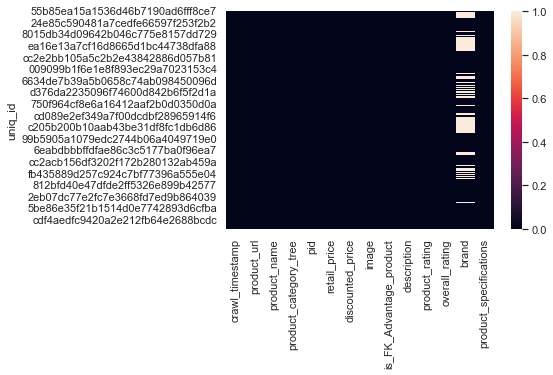

In [13]:
#Heatmap pour voir les colonnes manquantes
sns.heatmap(data.isna())

## Colonnes dupliquées

In [14]:
for col in data.columns :
    n = data.duplicated(subset=col).sum()
    print(f'col : {col} -> duplicated : {n}')

col : crawl_timestamp -> duplicated : 901
col : product_url -> duplicated : 0
col : product_name -> duplicated : 0
col : product_category_tree -> duplicated : 408
col : pid -> duplicated : 0
col : retail_price -> duplicated : 695
col : discounted_price -> duplicated : 625
col : image -> duplicated : 0
col : is_FK_Advantage_product -> duplicated : 1048
col : description -> duplicated : 0
col : product_rating -> duplicated : 1023
col : overall_rating -> duplicated : 1023
col : brand -> duplicated : 559
col : product_specifications -> duplicated : 65


## Data Inspection

In [15]:
#Stats des colonnes numériques
data.describe(include=np.number)

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [16]:
#Stats en incluant colonne varchar
data.describe(include=object)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1050,1050,1050,1050,712,1049
unique,149,1050,1050,642,1050,1050,1050,27,27,490,984
top,2015-12-01 12:40:44 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",CRNEG7BKMFFYHQ8Z,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,150,1,1,56,1,1,1,889,889,11,22


# Product category analysis
Colonne intéressante : catégorie de produit + sous catégorie (Ex: Electroménager + cuisine + cuisson 
Analyser les catégories de produits et les sous catégories de produit

1er niveau de catégories : combien de catégries et nb produit par catégorie
Idem pour la 2e catégore : nb Catégries + répartition

In [17]:
data.shape

(1050, 14)

In [18]:
data.sample(2)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
964648862f322b2cc153239af04b22ef,2016-01-07 05:50:25 +0000,http://www.flipkart.com/arb-toshiba-dynabook-s...,ARB Toshiba Dynabook SS MX/395LS Compatible Bl...,"[""Computers >> Laptop Accessories >> Batteries...",ACCDY6GVZYHGRRPP,3499.0,1599.0,964648862f322b2cc153239af04b22ef.jpg,False,Buy ARB Toshiba Dynabook SS MX/395LS Compatibl...,No rating available,No rating available,ARB,"{""product_specification""=>[{""key""=>""In The Box..."
17a73d7c4b02ada2bfeed1115fed08a4,2015-12-01 06:13:00 +0000,http://www.flipkart.com/envy-1000-force-combo-...,Envy-1000 Force Combo Set,"[""Beauty and Personal Care >> Fragrances >> De...",CAGE79CEHJZX52XS,360.0,329.0,17a73d7c4b02ada2bfeed1115fed08a4.jpg,False,Flipkart.com: Buy Envy-1000 Force Combo Set on...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Number of ..."


Length
Calculer la longueur des documents category product : Nbre de caractères

In [19]:
data.product_category_tree.apply(lambda i : len(i))

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    112
7b72c92c2f6c40268628ec5f14c6d590    137
64d5d4a258243731dc7bbb1eef49ad74    136
d4684dcdc759dd9cdf41504698d737d8    135
6325b6870c54cd47be6ebfbffa620ec7    126
                                   ... 
958f54f4c46b53c8a0a9b8167d9140bc     71
fd6cbcc22efb6b761bd564c28928483c     69
5912e037d12774bb73a2048f35a00009     67
c3edc504d1b4f0ba6224fa53a43a7ad6     69
f2f027ad6a6df617c9f125173da71e44     67
Name: product_category_tree, Length: 1050, dtype: int64

In [20]:
## de manière graphique en appelant la méthode len de str
tmp = data.product_category_tree.str.len()

C:\Users\ADSL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_category_tree'>

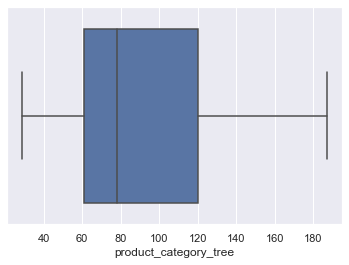

In [21]:
sns.boxplot(tmp)

La majorité des catégories fait entre 70 et 140 caractères avec une moyenne de 100 car.

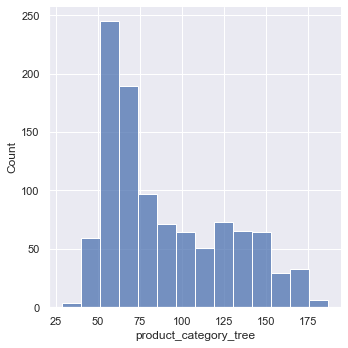

In [22]:
#Distribution nombre de catégories/longueur de texte
sns.displot(tmp)

Stockons le vecteur numérique dans 1 colonne len_cat

In [23]:
data['cat_prod_len_text'] = tmp

In [24]:
data.sort_values('cat_prod_len_text').head(5)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_prod_len_text
uniq_id,,,,,,,,,,,,,,,
159b45e4dede207f28319bf1cacee3bc,2015-12-20 08:26:17 +0000,http://www.flipkart.com/msenterprises-floral-c...,MSenterprises Floral Cushions Cover,"[""Home Furnishing >> Living""]",CPCEDGM4RPXJHBHG,1299.0,580.0,159b45e4dede207f28319bf1cacee3bc.jpg,False,MSenterprises Floral Cushions Cover (Pack of 5...,No rating available,No rating available,MSenterprises,"{""product_specification""=>[{""key""=>""Closure"", ...",29
e56ffc10078972b5f4e7302383db8d72,2015-12-20 08:26:17 +0000,http://www.flipkart.com/nikunj-abstract-cushio...,Nikunj Abstract Cushions Cover,"[""Home Furnishing >> Living""]",CPCECSABG58X5KHG,1199.0,999.0,e56ffc10078972b5f4e7302383db8d72.jpg,False,"Nikunj Abstract Cushions Cover (Pack of 5, 40 ...",No rating available,No rating available,Nikunj,"{""product_specification""=>[{""key""=>""Closure"", ...",29
bcb8e456728013a90ba66ab3b1b783ad,2016-01-07 04:32:43 +0000,http://www.flipkart.com/hp-15-ac121tu-notebook...,HP 15-ac121tu (Notebook) (Core i3 (5th Gen)/ 4...,"[""Computers >> Laptops >> HP Laptops""]",COMEAZ94HWYQTZHZ,35390.0,35390.0,bcb8e456728013a90ba66ab3b1b783ad.jpg,True,Buy HP 15-ac121tu (Notebook) (Core i3 (5th Gen...,4.5,4.5,HP,"{""product_specification""=>[{""key""=>""Included S...",38
85aec4bf3185da7ebcc45003429cbfe2,2016-01-07 04:32:43 +0000,http://www.flipkart.com/hp-15-ac116tx-notebook...,HP 15-ac116TX (Notebook) (Core i3 (5th Gen)/ 4...,"[""Computers >> Laptops >> HP Laptops""]",COMEAZ945RHFFGUS,38890.0,38890.0,85aec4bf3185da7ebcc45003429cbfe2.jpg,True,Buy HP 15-ac116TX (Notebook) (Core i3 (5th Gen...,5,5,HP,"{""product_specification""=>[{""key""=>""Included S...",38
d395b2f3d13ff8897f403c6141e0e39a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/amber-cotton-set-towel...,Amber Cotton Set of Towels,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWE3SMGZCGQMAZX,523.0,239.0,d395b2f3d13ff8897f403c6141e0e39a.jpg,False,Buy Amber Cotton Set of Towels at Rs. 239 at F...,No rating available,No rating available,Amber,"{""product_specification""=>[{""key""=>""Material"",...",43


In [25]:
data.sort_values('cat_prod_len_text').tail(5)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_prod_len_text
uniq_id,,,,,,,,,,,,,,,
2414e4b7e5948263b8dbb4843557be4d,2016-03-07 19:42:22 +0000,http://www.flipkart.com/smart-wall-guru-large-...,Smart Wall Guru Large Adhesive Sticker Sticker,"[""Home Decor & Festive Needs >> Wall Decor & C...",STIEGKHUWG8GTKFB,1599.0,499.0,2414e4b7e5948263b8dbb4843557be4d.jpg,False,Key Features of Smart Wall Guru Large Adhesive...,No rating available,No rating available,Smart Wall Guru,"{""product_specification""=>[{""key""=>""Number of ...",176
61c0139f3d5c97f1615797dbf046cc0c,2016-05-16 22:42:47 +0000,http://www.flipkart.com/smart-wall-guru-medium...,Smart Wall Guru Medium Adhesive Sticker,"[""Home Decor & Festive Needs >> Wall Decor & C...",STIEGPNXUZ7MJHNF,1199.0,299.0,61c0139f3d5c97f1615797dbf046cc0c.jpg,False,Key Features of Smart Wall Guru Medium Adhesiv...,No rating available,No rating available,Smart Wall Guru,"{""product_specification""=>[{""key""=>""Number of ...",176
29def171d7e31d48571a52f0fb3e6b07,2016-03-02 19:09:22 +0000,http://www.flipkart.com/ech-oly-ceramic-inside...,Ech oly Ceramic Inside Fitting Hookah Mouth Tip,"[""Home Decor & Festive Needs >> Table Decor & ...",HMTEFW3SGGF9HYPT,1799.0,699.0,29def171d7e31d48571a52f0fb3e6b07.jpg,False,Ech oly Ceramic Inside Fitting Hookah Mouth Ti...,No rating available,No rating available,Ech oly,"{""product_specification""=>[{""key""=>""Brand"", ""v...",179
fa2e5f01bbb642c49e4b2e19d2b39dcf,2016-05-19 02:12:59 +0000,http://www.flipkart.com/lottie-london-make-me-...,LOTTIE LONDON MAKE ME BLUSH,"[""Beauty and Personal Care >> Beauty Accessori...",BAREGTPNZNHZHA8Z,850.0,765.0,fa2e5f01bbb642c49e4b2e19d2b39dcf.jpg,False,LOTTIE LONDON MAKE ME BLUSH (Pack of 1) Price:...,No rating available,No rating available,LOTTIE LONDON,"{""product_specification""=>[{""key""=>""Brush Type...",183
7821fb1cbf8d3bb294c3c20527119f15,2016-03-03 06:06:42 +0000,http://www.flipkart.com/surgical-e-sstudio-s00...,"Surgical e Sstudio S0004 Gown, Pant Hospital S...","[""Beauty and Personal Care >> Health Care >> M...",HTSEG6YUAFSNFG6M,2500.0,1650.0,7821fb1cbf8d3bb294c3c20527119f15.jpg,False,"Key Features of Surgical e Sstudio S0004 Gown,...",No rating available,No rating available,Surgical e Sstudio,"{""product_specification""=>[{""key""=>""Brand"", ""v...",187


In [26]:
# Determining the maximum tree depth of categories

ser_depth = data['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

In [27]:
# Suppression de la colonne cat_prod_len_text
data.drop(columns='cat_prod_len_text', inplace=True)

In [28]:
# Converting the strings in 'product_category_tree' column in 6 categ columns

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = data['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=data.index)

In [29]:
# printing number of categories in each level and a sample
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5
uniq_id,,,,,,
a371cfcae8c6ec3b82ae37a83a8ae9b9,Home Furnishing,Home Furnishing/Bed Linen,"Home Furnishing/Bed Linen/Blankets, Quilts & D...","Home Furnishing/Bed Linen/Blankets, Quilts & D...","Home Furnishing/Bed Linen/Blankets, Quilts & D...","Home Furnishing/Bed Linen/Blankets, Quilts & D..."
a43fbae655e5d13215b9dd65339fa9d4,Computers,Computers/Network Components,Computers/Network Components/Routers,Computers/Network Components/Routers/Huawei Ro...,Computers/Network Components/Routers/Huawei Ro...,Computers/Network Components/Routers/Huawei Ro...
735820e1614052fde55659da9dc10ccc,Kitchen & Dining,Kitchen & Dining/Bar & Glassware,Kitchen & Dining/Bar & Glassware/Bar Accessories,Kitchen & Dining/Bar & Glassware/Bar Accessori...,Kitchen & Dining/Bar & Glassware/Bar Accessori...,Kitchen & Dining/Bar & Glassware/Bar Accessori...


## Items Number in each category

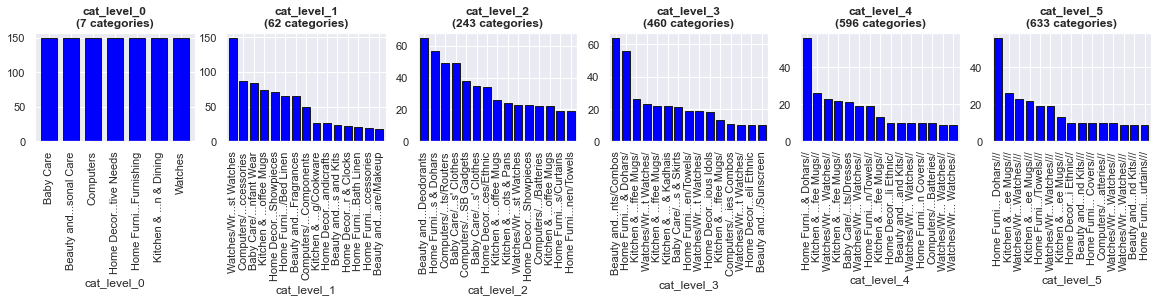

In [30]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(20,2))
for i, col in enumerate(df_cat_level.columns,1):
    # plot the graphs
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.75, color='blue', ec='k', ax=ax)
    # shorten the labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # set title
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

In [31]:
# Category level 0
df_cat_level.cat_level_0.unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

Level_0 has 7 catagries and 150 products by categroy. He is balanced. So lets get only level_0 and rename this 7 categories

In [32]:
df_cat_level['category'] = \
df_cat_level['cat_level_0'].replace ({'Home Furnishing' : 'Furnishing',
                                      'Baby Care' : 'Baby',
                                      'Home Decor & Festive Needs' : 'Home',
                                      'Kitchen & Dining' : 'Kitchen',
                                      'Beauty and Personal Care' : 'Beauty'
                                     })

In [33]:
df_cat_level.sample(3)

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5,category
uniq_id,,,,,,,
c7d81193e868b50355412ced7a67f8f3,Watches,Watches/Wrist Watches,Watches/Wrist Watches/Maxima Wrist Watches,Watches/Wrist Watches/Maxima Wrist Watches/,Watches/Wrist Watches/Maxima Wrist Watches//,Watches/Wrist Watches/Maxima Wrist Watches///,Watches
9438a0874e0486f46f3669cac6c2ac90,Computers,Computers/Network Components,Computers/Network Components/Routers,Computers/Network Components/Routers/Edimax Ro...,Computers/Network Components/Routers/Edimax Ro...,Computers/Network Components/Routers/Edimax Ro...,Computers
fc93a41f31c4e997fbfcc5bd0a63ee65,Watches,Watches/Wrist Watches,Watches/Wrist Watches/Perucci Wrist Watches,Watches/Wrist Watches/Perucci Wrist Watches/,Watches/Wrist Watches/Perucci Wrist Watches//,Watches/Wrist Watches/Perucci Wrist Watches///,Watches


In [34]:
df_cat_level.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cat_level_0  1050 non-null   object
 1   cat_level_1  1050 non-null   object
 2   cat_level_2  1050 non-null   object
 3   cat_level_3  1050 non-null   object
 4   cat_level_4  1050 non-null   object
 5   cat_level_5  1050 non-null   object
 6   category     1050 non-null   object
dtypes: object(7)
memory usage: 97.9+ KB


In [35]:
data.sample(1)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
5cd3d274d71e1e0d6bf075421461b2d5,2016-01-01 19:37:22 +0000,http://www.flipkart.com/sapatos-geometric-sing...,Sapatos Geometric Single Duvet Purple & Pink,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",BLAEEJGJ6T2NHJRK,2999.0,1499.0,5cd3d274d71e1e0d6bf075421461b2d5.jpg,False,Sapatos Geometric Single Duvet Purple & Pink (...,No rating available,No rating available,Sapatos,"{""product_specification""=>[{""key""=>""Machine Wa..."


## Simplify the dataset
Have only category, product name and product description

In [36]:
df = pd.concat([df_cat_level['category'], data[['product_name', 'description']]], axis=1)

In [37]:
df.sample(5)

,category,product_name,description
uniq_id,,,
8e94fbcd81112a21860355b3b11cf52d,Beauty,"Denver Sport,Hamilton Combo Set","Flipkart.com: Buy Denver Sport,Hamilton Combo ..."
378d7dbdb97ecc62c9ad52cb6df23a86,Kitchen,Checkered Chef Steel All-Purpose Scissor,"Checkered Chef Steel All-Purpose Scissor (Red,..."
0bff0eda7a6677dc1acb0477a1f7a121,Baby,"Shaun Solid Baby Boy's Grey, Dark Blue Track P...","Specifications of Shaun Solid Baby Boy's Grey,..."
a898bd6978f9f2c6aa940b9fa3352c27,Beauty,Archies VJ-552 Combo Set,Flipkart.com: Buy Archies VJ-552 Combo Set onl...
374e63028d691c380bc43b0dc60e460d,Home,@home Glass Vase,"Specifications of @home Glass Vase (18 inch, G..."


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea15a1536d46b7190ad6fff8ce7 to f2f027ad6a6df617c9f125173da71e44
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      1050 non-null   object
 1   product_name  1050 non-null   object
 2   description   1050 non-null   object
dtypes: object(3)
memory usage: 65.1+ KB


## Look to the particular items

In [39]:
df.loc['4a1b23dacd7d2a9ec7414f7159f25a48'].product_name

'Mars Queen Eye Liner, Lip Gloss, EyeLiner'

In [40]:
df.loc['4a1b23dacd7d2a9ec7414f7159f25a48'].description

'Mars Queen Eye Liner, Lip Gloss, EyeLiner (Set of 3) Price: Rs. 299 1 Queen Eye Liner, 1 Lip Gloss, 1 EyeLiner,Specifications of Mars Queen Eye Liner, Lip Gloss, EyeLiner (Set of 3) Combo Set Details Number of Contents in Combo Set 3 Combo Set Contents 1 Queen Eye Liner, 1 Lip Gloss, 1 EyeLiner Ideal For Women Organic No General Traits Professional Care Yes Gift Pack Yes'

In [41]:
df.loc['d21409978f5e404b53f89e444f7893fe'].product_name

'SF by Sonata 7991PP02 Ocean Digital Watch  - For Men'

In [42]:
df.loc['d21409978f5e404b53f89e444f7893fe'].description

'SF by Sonata 7991PP02 Ocean Digital Watch  - For Men - Buy SF by Sonata 7991PP02 Ocean Digital Watch  - For Men  7991PP02 Online at Rs.999 in India Only at Flipkart.com. Water Resistant, Round Dial, Black Strap - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!'

# Explore corpus and documents :

# Description de produit

## Data Assessment

### Nan and duplicated

In [43]:
df.isna().sum()

category        0
product_name    0
description     0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.duplicated('product_name').sum()

0

In [46]:
df.duplicated('description').sum()

0

Longueur des documents

In [47]:
df.description.apply(lambda i : len(i))

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    1420
7b72c92c2f6c40268628ec5f14c6d590     444
64d5d4a258243731dc7bbb1eef49ad74    1258
d4684dcdc759dd9cdf41504698d737d8     858
6325b6870c54cd47be6ebfbffa620ec7    1197
                                    ... 
958f54f4c46b53c8a0a9b8167d9140bc    2432
fd6cbcc22efb6b761bd564c28928483c    1660
5912e037d12774bb73a2048f35a00009     262
c3edc504d1b4f0ba6224fa53a43a7ad6     210
f2f027ad6a6df617c9f125173da71e44     187
Name: description, Length: 1050, dtype: int64

la taille de description est très variable

In [48]:
df.product_name.apply(lambda i : len(i))

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    58
7b72c92c2f6c40268628ec5f14c6d590    26
64d5d4a258243731dc7bbb1eef49ad74    35
d4684dcdc759dd9cdf41504698d737d8    63
6325b6870c54cd47be6ebfbffa620ec7    53
                                    ..
958f54f4c46b53c8a0a9b8167d9140bc    46
fd6cbcc22efb6b761bd564c28928483c    38
5912e037d12774bb73a2048f35a00009    65
c3edc504d1b4f0ba6224fa53a43a7ad6    39
f2f027ad6a6df617c9f125173da71e44    28
Name: product_name, Length: 1050, dtype: int64

In [49]:
## de manière graphique en appelant la méthode len de str
df_sample = data.description.str.len()

C:\Users\ADSL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='description'>

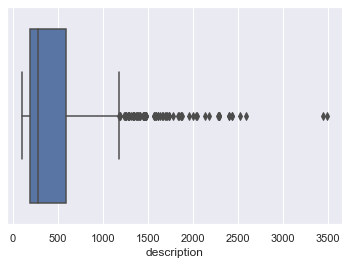

In [50]:
sns.boxplot(df_sample)

La majorité des descriptions fait entre 200 et 600 caractères avec une moyenne de 250 car.
On qq ouliers avec une taille élevée

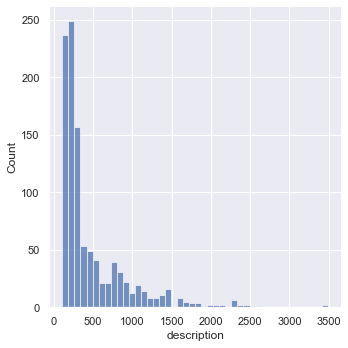

In [51]:
#Distribution nombre de description/longueur de texte
sns.displot(df_sample)

## Multivariate analysis

In [52]:
# La matrice de corréaltion n'est valable que pour les données numériques. Notre dataframe ne contient que du texte
corr = df.corr()
corr

# sns.heatmap(corr)

""


In [53]:
df_sample = df.sample(5)
df_sample

,category,product_name,description
uniq_id,,,
4f8f64f93f789af51bb07296639acbd2,Beauty,Oxyglow Saffron with vitamin-E Gold Massage Cr...,Buy Oxyglow Saffron with vitamin-E Gold Massag...
968a2b3be84193e3f755c2fe71033a2c,Home,Sovam International Krishna With Cow Idol Show...,Sovam International Krishna With Cow Idol Show...
621a88993a7033df3440ec816c2e386f,Computers,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...","Shopfloor.XYZ Vacuum Cleaner for Computers, La..."
894904e26516d491bf1c7711fe800e78,Watches,"Only Kidz 20600 Digital Watch - For Boys, Girls","Only Kidz 20600 Digital Watch - For Boys, Gir..."
b52073e7ed9c00c4108cae4eb0c49c1a,Watches,Vizion 8502-7PURPLE Sports Series Digital Watc...,Vizion 8502-7PURPLE Sports Series Digital Watc...


In [54]:
# Loguenur du nom du produit
df.product_name.apply(lambda i : len(i))

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    58
7b72c92c2f6c40268628ec5f14c6d590    26
64d5d4a258243731dc7bbb1eef49ad74    35
d4684dcdc759dd9cdf41504698d737d8    63
6325b6870c54cd47be6ebfbffa620ec7    53
                                    ..
958f54f4c46b53c8a0a9b8167d9140bc    46
fd6cbcc22efb6b761bd564c28928483c    38
5912e037d12774bb73a2048f35a00009    65
c3edc504d1b4f0ba6224fa53a43a7ad6    39
f2f027ad6a6df617c9f125173da71e44    28
Name: product_name, Length: 1050, dtype: int64

### Concaténer le nom du produit avec la description 
Ne garder que la description du produit et sa categorie

In [55]:
#Renommer la catégorie produit
df['description'] =df['product_name'] + ' ' + df['description']

In [56]:
# Suppression de la colonne product_name
df.drop(columns='product_name', inplace=True)

In [57]:
#df.category.unique()

In [58]:
#df[df['category'] =='Watches']
#order_items[order_items['order_id'] == '9c4f3693a36ba481e0d9da739679660c']

In [59]:
#imprimer la catégorie du produit, le nom du produit et sa description avec une meilleure présentation
for idx, ser in df_sample.iterrows() :
    txt_1 = f"category_product : {ser['category']}\n" #Target + saut dde lignes
    print(txt_1 + ser['description']+ "..." + '\n\n\n') #2 retours chariots
   ## print(txt_1 + ser['description']+ "..." + '\n\n') #2 retours chariots

category_product : Beauty
Buy Oxyglow Saffron with vitamin-E Gold Massage Cream & Almond Under Eye Repair Care for Rs.579 online. Oxyglow Saffron with vitamin-E Gold Massage Cream & Almond Under Eye Repair Care at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....



category_product : Home
Sovam International Krishna With Cow Idol Showpiece  -  6 cm (Brass, White)
                         Price: Rs. 1,240
				
			this handcrafted antique idol of Lord Krishna with Cow on metal durable stand is made of pure white metal. The idol is silver polished to give it alluring antique look. It is also an ideal gift for your friends and relatives. The gift piece has been prepared by the creative artisans
this handcrafted antique idol of Lord Krishna with Cow on metal durable stand is made of pure white metal. The idol is silver polished to give it alluring antique look. It is also an ideal gift for your friends and relatives. The gift piece h

In [60]:
#Imprimer 10 documents au hasard d'un sous dataframe
def print_sample(sub_df, n_sample=10):
    """ print out n_samples documents from a corpus """
    samp = sub_df.sample(n_sample)
    for idx, ser in samp.iterrows() :
        txt_1 = f"category : {ser['category']}\n" #Target + RC
        print(txt_1 + ser['description']+ "..." + '\n\n') #2 RC

In [61]:
print_sample(df)

category : Home
Nihar Pirangi Bomber Showpiece  -  10 cm Buy Nihar Pirangi Bomber Showpiece  -  10 cm for Rs.194 online. Nihar Pirangi Bomber Showpiece  -  10 cm at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee....


category : Baby
Funcart Frolic Birthday  - Food Grade Plastic Flipkart.com is offering Small Funcart Frolic Birthday  - Food Grade Plastic for only for Rs 154 | Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!...


category : Furnishing
Rama Floral Single Quilts & Comforters Pink-Red Buy Rama Floral Single Quilts & Comforters Pink-Red at Rs. 749 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!...


category : Kitchen
Deep kitchen press Steel Grater and Slicer Specifications of Deep kitchen press Steel Grater and Slicer (Steel, Pack of 16) General Brand Deep Model Number 112 Type Grater and Slicer Material Steel Model Name kitchen press Slicer Type NA Color Steel In the box

 # Text Processing
 ## Fonctions : Tokenizer, stop words, baw, etc..
 Tokeniser = réduire un ensembe de documents en briques élémentaires

In [62]:
# Mettre les stopwords dans un set

stop_w = list(set(stopwords.words('english'))) + ['(', ')', '.', ',', '?', '!','[', ']', ':'] #Ne pas utiliser le sw english car les montres ont des reférences non connues

#stop_w =  ['(', ')', '.', ',', '?', '!','[', ']', ':']

# Fonction qui tokenise un texte en phrases en remplaçant les caractères -, +, par ' '
def tokenizer_fct(sentence):
    sentence_clean  = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_token = word_tokenize(sentence_clean)
    return word_token

# Fonction qui tokenise un document constitué d'une liste de mots, supprime les stopwords et les tokens < 3 caractères
def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 1] # >3 dégrade le ARI et Yellowbrick très coûteux suTF-IDF
    return filtered_w2

# lower case et alpha sauf pour les mots commençant avec @ et http
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
                                         and (not w.startswith("http"))]
    return lw

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)# Tokeniser le texte
    sw = stop_word_filter_fct(word_tokens)#supprimer les stop words
    lw = lower_start_fct(sw) # transforme le txte en minuscule
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw) #renvoie le texte dans une chaine de caractères
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    #lemmatiser
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


In [63]:
#Préparation de chq type de bag of words et ajout dans les colonnes du dataset
df['description_bow'] =     df['description'].apply(lambda x : transform_bow_fct(x))
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))##Pour lematiser
df['description_dl'] =      df['description'].apply(lambda x : transform_dl_fct(x)) ##Pour le DeepLearning
df.shape

(1050, 5)

In [64]:
#Sauvegardre le dataframe  nettoyé
data.to_csv(path + '/cleaned/flipkart_com_cleaned.csv', index=False)# pour éviter d'avoir une colonne unamed=0, spécifier index=False

In [65]:
df.sample(5)

,category,description,description_bow,description_bow_lem,description_dl
uniq_id,,,,,
8ec6ee9814a27423e66c3c9ea26f77aa,Furnishing,Scalabedding Cotton Striped King sized Double ...,scalabedding cotton striped king sized double ...,scalabedding cotton striped king sized double ...,scalabedding cotton striped king sized double ...
8876d7569efdaff5a21b33a1ab44a13d,Baby,MKB Baby Girl's Shirt Dress Key Features of MK...,mkb baby girl 's shirt dress key features mkb ...,mkb baby girl 's shirt dress key feature mkb b...,mkb baby girl 's shirt dress key features of m...
4a1b23dacd7d2a9ec7414f7159f25a48,Beauty,"Mars Queen Eye Liner, Lip Gloss, EyeLiner Mars...",mars queen eye liner lip gloss eyeliner mars q...,mar queen eye liner lip gloss eyeliner mar que...,"mars queen eye liner , lip gloss , eyeliner ma..."
908cc351957d02f72f60916006c531ba,Home,Rajo Raja Mahavastu Buddha Artpiece Showpiece ...,rajo raja mahavastu buddha artpiece showpiece ...,rajo raja mahavastu buddha artpiece showpiece ...,rajo raja mahavastu buddha artpiece showpiece ...
d21409978f5e404b53f89e444f7893fe,Watches,SF by Sonata 7991PP02 Ocean Digital Watch - F...,sf sonata 7991pp02 ocean digital watch for men...,sf sonata 7991pp02 ocean digital watch for men...,sf by sonata 7991pp02 ocean digital watch for ...


In [66]:
df['length_bow'] = df['description_bow'].apply(lambda x : len(word_tokenize(x)))
print("max length bow : ", df['length_bow'].max())
df['length_dl'] = df['description_dl'].apply(lambda x : len(word_tokenize(x)))
print("max length dl : ", df['length_dl'].max())
df['length_lem'] = df['description_bow_lem'].apply(lambda x : len(word_tokenize(x)))
print("max length lem : ", df['length_lem'].max())

max length bow :  407
max length dl :  637
max length lem :  407


In [67]:
df.sample(5)

,category,description,description_bow,description_bow_lem,description_dl,length_bow,length_dl,length_lem
uniq_id,,,,,,,,
c75d6d827876b0d0127acb59e5a251ee,Computers,TRENDnet TEW-752DRU Buy TRENDnet TEW-752DRU on...,trendnet tew 752dru buy trendnet tew 752dru rs...,trendnet tew 752dru buy trendnet tew 752dru r ...,trendnet tew 752dru buy trendnet tew 752dru on...,22,31,22
9c8fdf6c9c631d0892e9a6f55a4a2fd2,Beauty,"NYX Set Of 2 Soft Matte Lip Cream 06,22 NYX Se...","nyx set of soft matte lip cream 06,22 nyx set ...","nyx set of soft matte lip cream 06,22 nyx set ...","nyx set of 2 soft matte lip cream 06,22 nyx se...",93,123,93
c5590e238d44b370337624f5987fb9b8,Kitchen,Rockmantra Abstrcts 8 Ceramic Mug Rockmantra A...,rockmantra abstrcts ceramic mug rockmantra abs...,rockmantra abstrcts ceramic mug rockmantra abs...,rockmantra abstrcts 8 ceramic mug rockmantra a...,88,145,88
e0e261a0d4fd2ffdcbcad324e91a0dd4,Furnishing,Ally The Creations Printed Cushions Cover Key ...,ally the creations printed cushions cover key ...,ally the creation printed cushion cover key fe...,ally the creations printed cushions cover key ...,144,198,144
a7bd63ef1d3b345d7f9a162865bb7c0d,Watches,Flippd FD040149 Casual Analog Watch - For Wom...,flippd fd040149 casual analog watch for women ...,flippd fd040149 casual analog watch for woman ...,flippd fd040149 casual analog watch for women ...,45,57,45


In [68]:
df.loc['4a1b23dacd7d2a9ec7414f7159f25a48'].description_bow

'mars queen eye liner lip gloss eyeliner mars queen eye liner lip gloss eyeliner set price rs 299 queen eye liner lip gloss eyeliner specifications mars queen eye liner lip gloss eyeliner set combo set details number contents combo set combo set contents queen eye liner lip gloss eyeliner ideal for women organic no general traits professional care yes gift pack yes'

In [69]:
df.loc['4a1b23dacd7d2a9ec7414f7159f25a48'].description_dl

'mars queen eye liner , lip gloss , eyeliner mars queen eye liner , lip gloss , eyeliner ( set of 3 ) price : rs . 299 1 queen eye liner , 1 lip gloss , 1 eyeliner , specifications of mars queen eye liner , lip gloss , eyeliner ( set of 3 ) combo set details number of contents in combo set 3 combo set contents 1 queen eye liner , 1 lip gloss , 1 eyeliner ideal for women organic no general traits professional care yes gift pack yes'

In [70]:
df.loc['d21409978f5e404b53f89e444f7893fe'].description_bow

'sf sonata 7991pp02 ocean digital watch for men sf sonata 7991pp02 ocean digital watch for men buy sf sonata 7991pp02 ocean digital watch for men 7991pp02 online rs.999 india only flipkart.com water resistant round dial black strap great discounts only genuine products 30 day replacement guarantee free shipping cash on delivery'

In [71]:
df.loc['d21409978f5e404b53f89e444f7893fe'].description_dl

'sf by sonata 7991pp02 ocean digital watch for men sf by sonata 7991pp02 ocean digital watch for men buy sf by sonata 7991pp02 ocean digital watch for men 7991pp02 online at rs.999 in india only at flipkart.com . water resistant , round dial , black strap great discounts , only genuine products , 30 day replacement guarantee , free shipping . cash on delivery !'

In [72]:
#Supprimer les colonnes inutiles à ce stade
#Ne pas supprimer le txte brut de la colonne desription. Gardons le pour les autres modèles BERT, spacy etc..
cols = ['length_bow', 'length_dl', 'length_lem']#, 'description']
df.drop(columns=cols, inplace=True)

In [73]:
df.sample(2)

,category,description,description_bow,description_bow_lem,description_dl
uniq_id,,,,,
5db6bd89da44841c1a5b686e67137704,Watches,Sonata 1141YM22 Analog Watch - For Men Sonata...,sonata 1141ym22 analog watch for men sonata 11...,sonata 1141ym22 analog watch for men sonata 11...,sonata 1141ym22 analog watch for men sonata 11...
8507eb0ef32c1c0db700f20aad6d9bcd,Kitchen,Rockmantra Sonakshi Sinha Beautiful Look Ceram...,rockmantra sonakshi sinha beautiful look ceram...,rockmantra sonakshi sinha beautiful look ceram...,rockmantra sonakshi sinha beautiful look ceram...


In [74]:
#Pourcentage des produits par catégorie
df.category.value_counts(normalize=True)

Furnishing    0.142857
Baby          0.142857
Watches       0.142857
Home          0.142857
Kitchen       0.142857
Beauty        0.142857
Computers     0.142857
Name: category, dtype: float64

taille des colonnes text

## Work in a specfic document

Fonction qui indique le nb de tokens et celui de tokens uniques

In [75]:
#select a random document
doc = df.description_bow.sample(1)
doc = doc.values[0]
doc

'rama floral single quilts comforters pink red buy rama floral single quilts comforters pink red rs 749 flipkart.com only genuine products free shipping cash on delivery'

In [76]:
#tokenize
tokens = word_tokenize(doc)
tokens

['rama',
 'floral',
 'single',
 'quilts',
 'comforters',
 'pink',
 'red',
 'buy',
 'rama',
 'floral',
 'single',
 'quilts',
 'comforters',
 'pink',
 'red',
 'rs',
 '749',
 'flipkart.com',
 'only',
 'genuine',
 'products',
 'free',
 'shipping',
 'cash',
 'on',
 'delivery']

In [77]:
#Longeur du documents en nombre de tokens
len(tokens)

26

In [78]:
#tokens uniques
len(set(tokens))

19

In [79]:
#Fonction qui indique le nb de tokens et celui de tokens uniques
def display_tokens_info(tokens) :
    """display info about corpus """
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30]) #print les 30 premiers tokens de notre liste

In [80]:
display_tokens_info(tokens)

nb tokens 26, nb tokens uniques 19
['rama', 'floral', 'single', 'quilts', 'comforters', 'pink', 'red', 'buy', 'rama', 'floral', 'single', 'quilts', 'comforters', 'pink', 'red', 'rs', '749', 'flipkart.com', 'only', 'genuine', 'products', 'free', 'shipping', 'cash', 'on', 'delivery']


## First cleaning function
RegexpTokenizer() divise une chaîne en sous chaînes à l'aide d'une expression régulière : minuscule, money expression etc..

# Working on the entire corpus

## Build raw corpus
texte brut

In [81]:
# vizualisation XXokens, l'affcichage va prendre bcp de temps
#sns.barplot(x=tmp.index, y=tmp.values)

In [82]:
df.sample(3)

,category,description,description_bow,description_bow_lem,description_dl
uniq_id,,,,,
c36ea960a14f164ee0f39ad6beb3796a,Watches,Sonata 77036SM02J Watch Sonata 77036SM02J Watc...,sonata 77036sm02j watch sonata 77036sm02j watc...,sonata 77036sm02j watch sonata 77036sm02j watc...,sonata 77036sm02j watch sonata 77036sm02j watc...
d43d9bb261aaaf818c81a645e727b2d3,Computers,TRENDnet THA-101 N300 Router Buy TRENDnet THA-...,trendnet tha 101 n300 router buy trendnet tha ...,trendnet tha 101 n300 router buy trendnet tha ...,trendnet tha 101 n300 router buy trendnet tha ...
64a9d0488652194fd8e879d5e6dc8015,Watches,"palito PLO 149 Analog Watch - For Girls, Wome...",palito plo 149 analog watch for girls women sp...,palito plo 149 analog watch for girl woman spe...,"palito plo 149 analog watch for girls , women ..."


In [83]:
corpus = df.description_bow.values

In [84]:
# Value counts - Nombre de fois où les tokens sont présents ds le corpus
tmp = pd.Series(corpus).value_counts()
tmp

elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type ey

In [85]:
#30st most common tokens
tmp.head(30)

elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type ey

In [86]:
# 30st last commn tokens
tmp.tail(30)

anna andre paris majesty deodorant combo set flipkart.com buy anna andre paris majesty deodorant combo set online rs 199 flipkart.com only genuine products 30 day replacement guarantee free shipping cash on delivery                    1
park avenue believe deodorant orignal edp combo set flipkart.com buy park avenue believe deodorant orignal edp combo set online rs 385 flipkart.com only genuine products 30 day replacement guarantee free shipping cash on delivery      1
trendnet n150 wireless adsl modem router buy trendnet n150 wireless adsl modem router rs 0.0 flipkart.com only genuine products 30 day replacement guarantee free shipping cash on delivery                                                1
binatone wr3000n buy binatone wr3000n rs 1800 flipkart.com only genuine products 30 day replacement guarantee free shipping cash on delivery                                                                                               1
kamasutra combo offer pack combo set flipkart.com bu

In [87]:
tmp.describe()

count    1050.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64

C:\Users\ADSL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

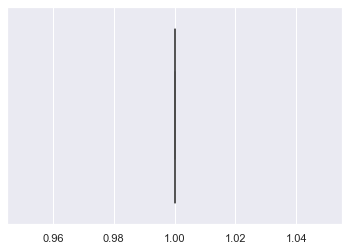

In [88]:
sns.boxplot(tmp)

In [89]:
#sns.displot(tmp)

50% des tockens présents 2 fois
Ce serait une distribution asymétrique des tokens. 

## List rare tokens
Liste des tokens rares.
Si le token est utilisé plusieurs fois, on sait qu'on va pouvoir l'utiliser
Si le token est utlisé une seule fois, soit il peut être émiminé lors de la réduction de dimensionalité, soit il ne puisse pas être utilisé comme dimension
Pour accélérer les calculs, on a intérêt à élimner les tokens présents une seule fois

In [90]:
#unique words --> not usefull
tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type ey

In [91]:
#Nombre de tokens uniques
len(list_unique_words)

1050

In [92]:
#chercher uniquement l'index et transformer le vecteur en une liste
list_unique_words = list(list_unique_words.index)

In [93]:
list_unique_words[:30]

['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type 

In [94]:
# save it for later. Une seule colonne words
tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv(path + "cleaned/unique_words.csv", index=False)

Faisons le même travail pour les mots présents moins de 5 fois

In [95]:
#unique words --> not usefull
#Liste des mots présents au moins 5 fois
tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp <= 5]
list_min_5_words[:30]

elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type ey

In [96]:
#Nombre de tokens présent au moins 5 fois
#75% des tokens
len(list_min_5_words)

1050

In [97]:
#chercher uniquement l'index et transformer le vecteur en une liste
list_min_5_words = list(list_min_5_words.index)
list_min_5_words[:5]

['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type 

In [98]:
# save it for later
tmp = pd.DataFrame({"words" : list_min_5_words})
tmp.to_csv(path + "cleaned/list_min_5_words.csv")

idem from min 10 times

In [99]:
#idem from min 10 times
tmp=pd.Series(corpus).value_counts()
list_min_10_words=tmp[tmp <= 10]
list_min_10_words[:30]

elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type ey

In [100]:
len(list_min_10_words)

1050

Pas de garnd écart entre les mots présents 5 et 10 fois

In [101]:
#chercher uniquement l'index et transformer le vecteur en une liste
#list_min_10_words = list(list_min_10_words.index)
#list_min_10_words[:30]

In [102]:
#save it
tmp = pd.DataFrame({"words" : list_min_10_words})
tmp.to_csv(path + "cleaned/list_min_10_words.csv")

#select a random document
doc = data.description_bow.sample(1)
doc = doc.values[0]
doc

In [103]:
corpus = df.description_bow.values

In [104]:
#corpus_desc = ' '.join(df['description_bow'].values)

In [105]:
#corpus_desc

In [106]:
display_tokens_info(corpus)

nb tokens 1050, nb tokens uniques 1050
['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general

In [107]:
#Taille du corpus en nb de lignes
len(set(corpus))

1050

In [108]:
display_tokens_info(corpus)

nb tokens 1050, nb tokens uniques 1050
['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general

In [109]:
doc=' I have 3 dogs, they are black. Now they are all white but one of my dog is my favorite'

In [110]:
tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc.lower())
print(tokens)

['i', 'have', '3', 'dogs', 'they', 'are', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorite']


In [111]:
trans = PorterStemmer()
trans_text = [trans.stem(i) for i in tokens]
print(trans_text)

['i', 'have', '3', 'dog', 'they', 'are', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorit']


In [112]:
trans = WordNetLemmatizer()
trans_text = [trans.lemmatize(i) for i in tokens]
print(trans_text)

['i', 'have', '3', 'dog', 'they', 'are', 'black', 'now', 'they', 'are', 'all', 'white', 'but', 'one', 'of', 'my', 'dog', 'is', 'my', 'favorite']


In [113]:
len(set(corpus))

1050

In [114]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [115]:
pd.Series(ser).sample(2)

c    3
b    2
dtype: int64

In [209]:
#corpus
df

,category,description,description_bow,description_bow_lem,description_dl,tokens
uniq_id,,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...,"[elegance, polyester, multicolor, abstract, ey..."
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel Specifications of S...,sathiyas cotton bath towel specifications sath...,sathiyas cotton bath towel specification sathi...,sathiyas cotton bath towel specifications of s...,"[sathiyas, cotton, bath, towel, specification,..."
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set Key Featur...,eurospa cotton terry face towel set key featur...,eurospa cotton terry face towel set key featur...,eurospa cotton terry face towel set key featur...,"[eurospa, cotton, terry, face, towel, set, key..."
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...,"[santosh, royal, fashion, cotton, printed, kin..."
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...,"[jaipur, print, cotton, floral, king, sized, d..."
...,...,...,...,...,...,...
958f54f4c46b53c8a0a9b8167d9140bc,Baby,Oren Empower Extra Large Self Adhesive Sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,oren empower extra large self adhesive sticker...,"[oren, empower, extra, large, self, adhesive, ..."
fd6cbcc22efb6b761bd564c28928483c,Baby,Wallmantra Large Vinyl Sticker Sticker Wallman...,wallmantra large vinyl sticker sticker wallman...,wallmantra large vinyl sticker sticker wallman...,wallmantra large vinyl sticker sticker wallman...,"[wallmantra, large, vinyl, sticker, sticker, w..."
5912e037d12774bb73a2048f35a00009,Baby,Uberlyfe Extra Large Pigmented Polyvinyl Films...,uberlyfe extra large pigmented polyvinyl films...,uberlyfe extra large pigmented polyvinyl film ...,uberlyfe extra large pigmented polyvinyl films...,"[uberlyfe, extra, large, pigmented, polyvinyl,..."


In [210]:
df.loc['762b6b22cccf91935e92446efe298fe3', 'description_bow']

"612 league baby boy 's checkered casual shirt specifications 612 league baby boy 's checkered casual shirt general details pattern checkered occasion casual ideal for baby boy 's shirt details sleeve half sleeve number contents sales package pack brand fit regular fabric 100 cotton fit regular additional details style code bls00s380001b fabric care enzyme wash"

In [117]:
pd.Series(corpus).sample(30)

215     king international ergonomic design long gripp...
511     lapguard hp pavilion dv5 1014tx cell laptop ba...
154     rockmantra cute beautiful girl playing with he...
183     rockmantra blue water abstracts ceramic mug ro...
910     beebay baby boy 's checkered casual shirt spec...
754     onlinemaniya abstract single quilts comforters...
1044    wallmantra medium vinyl stickers sticker buy w...
318     asus wireless ac2400 dual band gigabit router ...
25      alfajr wq18 qibla compass digital watch for me...
234     jsm hard anodized kadhai buy jsm hard anodized...
1026    aroma comfort polyester green self design eyel...
499     maxima 03918cmly analog watch for women maxima...
809     oxyglow lacto bleach fruit massage cream with ...
566     maxima 19883bmli swarovski analog watch for wo...
997     ctw ganpati bapa moriya statue showpiece 12 cm...
472     giftsthatwow gtw 06 key features giftsthatwow ...
224     lal haveli traditional hand crafted beautiful ...
696     tallen

On passe de 2998 tokens uniques à 2283

In [118]:
#Exécuter la fonction sur la liste des mots présents au moins 5 fois
list_min_5_words[:10]

['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door type 

Le nombre de tokens uniques ayant plus de 5 mots présents ne change pas 
2283 uniques

In [119]:
len(set(corpus))

1050

In [120]:
corpus

array(['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door

In [121]:
len(corpus)

1050

# Wordcloud
Visualize
sont des outils utiles pour synthétiser les notions les plus importantes d’un texte, d’une page web ou encore d’un livre. Plus un mot est présent dans le texte pris en considération, plus il apparaît en gros dans le wordcloud.  

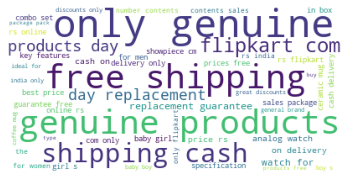

In [122]:
# Afficher le Wordclouds de description pour toutes les catégories
wordcloud = WordCloud(background_color="white",
                      stopwords=[],##Pas besoin d'enlever les stopwords/déjà fait
                      max_words=50).generate(" ".join(corpus))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

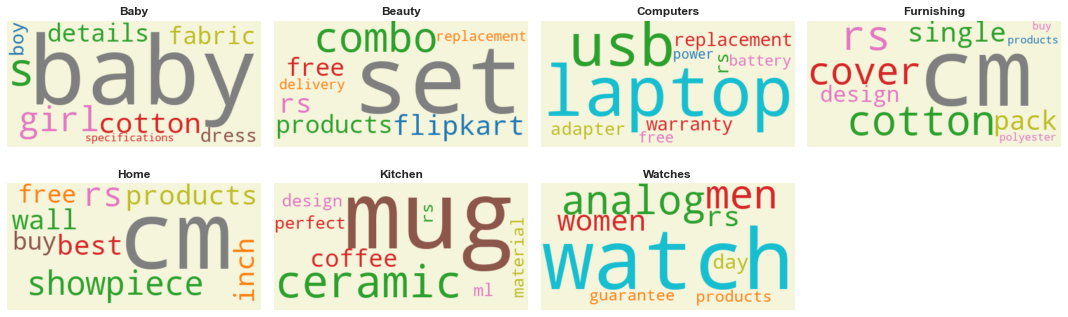

In [123]:
# Afficher le Wordclouds de description par catégorie 

gb = df.groupby('category')['description_bow']

plot_wordclouds_from_gb(gb, n_top_words=10, n_rows=2, figsize=(15,5),
                        backgnd_color='beige', cmap='tab10', random_state=14)

On constate des tokens qui se répétent : genuine, guarantee, warranty, flipkart, delivery, free, shipping, cash
On peut en supprimer une partie :  flipkart, delivery, free, shipping, cash, only, genuine
A ne pas supprimer : guarantee, warranty car liés à wtaches et computer

In [124]:
df.sample(5)

,category,description,description_bow,description_bow_lem,description_dl
uniq_id,,,,,
e1d8c5b60f9157f8e21c77cf795952f2,Baby,"The Intellect Bazaar Cotton Bath Towel, Baby T...",the intellect bazaar cotton bath towel baby to...,the intellect bazaar cotton bath towel baby to...,"the intellect bazaar cotton bath towel , baby ..."
a3dea07b2f7bf48276d32513091be717,Kitchen,BFT 6 W LED Bulb Key Features of BFT 6 W LED B...,bft led bulb key features bft led bulb pack bu...,bft led bulb key feature bft led bulb pack bul...,bft 6 w led bulb key features of bft 6 w led b...
fb42fce44e11f4dab8de99f8488281f8,Furnishing,Nagar Handloom Floral Double Quilts & Comforte...,nagar handloom floral double quilts comforters...,nagar handloom floral double quilt comforter m...,nagar handloom floral double quilts & comforte...
95ea40dc6c0e81407e13d70bd52a5c95,Beauty,Oxyglow Fruit Massage Cream With Vitamin-E & A...,oxyglow fruit massage cream with vitamin aleo ...,oxyglow fruit massage cream with vitamin aleo ...,oxyglow fruit massage cream with vitamin e & a...
04f9ff160a1561e3656350f4bd6b8c50,Furnishing,Craft Trade Oval Wood Coaster Set Key Features...,craft trade oval wood coaster set key features...,craft trade oval wood coaster set key feature ...,craft trade oval wood coaster set key features...


# Mettre les stopwords dans un set

stop_w = list(set(stopwords.words('english'))) + ['(', ')', '.', ',', '?', '!','[', ']', ':', 'flipkart', 'delivery', 'free', 'shipping', 'cash', 'delivery','only', 'genuine']

# Fonction qui tokenise un texte en phrases en remplaçant les caractères -, +, par ' '
def tokenizer_fct(sentence):
    sentence_clean  = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_token = word_tokenize(sentence_clean)
    return word_token

# Fonction qui tokenise un document constitué d'une liste de mots, supprime les stopwords et les tokens < 3 caractères
def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 3]
    return filtered_w2

# lower case et alpha sauf pour les mots commençant avec @ et http
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@"))
                                         and (not w.startswith("http"))]
    return lw

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)# Tokeniser le texte
    sw = stop_word_filter_fct(word_tokens)#supprimer les stop words
    lw = lower_start_fct(sw) # transforme le txte en minuscule
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw) #renvoie le texte dans une chaine de caractères
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    #lemmatiser
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text


#Sauvegardre le dataframe 
data.to_csv(path + '/cleaned/flipkart_com_cleaned.csv', index=False)# pour éviter d'avoir une colonne unamed=0, spécifier index=False

#Préparation de chq type de bag of words et ajout dans les colonnes du dataset
df['description_bow'] =     df['description'].apply(lambda x : transform_bow_fct(x))
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))##Pour lematiser
df['description_dl'] =      df['description'].apply(lambda x : transform_dl_fct(x)) ##Pour le DeepLearning
df.shape

stop_cw =  ['flipkart', 'delivery', 'free', 'shipping', 'cash', 'delivery','only', 'genuine']

#Fonction qui filtre les mots à très haute fréquence
def stop_com_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_cw]
    return filtered_w

In [125]:
df.sample(2)

,category,description,description_bow,description_bow_lem,description_dl
uniq_id,,,,,
a1fa0e24b2249ffa81f688c4840f1eb8,Beauty,Oxyglow Fruit Massage Cream With Vitamin-E & S...,oxyglow fruit massage cream with vitamin shea ...,oxyglow fruit massage cream with vitamin shea ...,oxyglow fruit massage cream with vitamin e & s...
54754ccd18f2a75c53de68806176392a,Computers,Netis WF-2301 Buy Netis WF-2301 only for Rs. 5...,netis wf 2301 buy netis wf 2301 rs 5249 flipka...,netis wf 2301 buy netis wf 2301 r 5249 flipkar...,netis wf 2301 buy netis wf 2301 only for rs . ...


In [126]:
corpus = df.description_bow.values

In [127]:
corpus

array(['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door

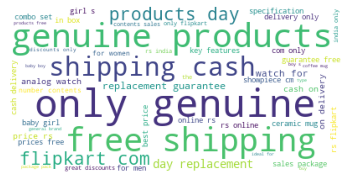

In [128]:
# Afficher le Wordclouds de description pour toutes les catégories
wordcloud = WordCloud(background_color="white",
                      stopwords=[],##Pas besoin d'enlever les stopwords/déjà fait
                      max_words=50).generate(" ".join(corpus))

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

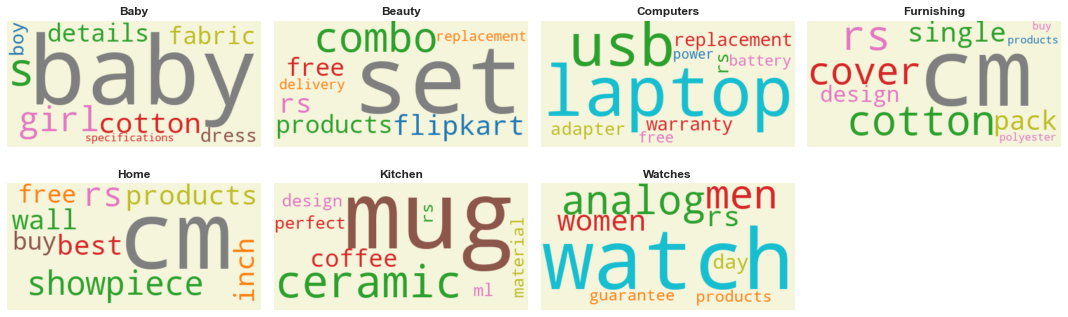

In [129]:
# Afficher le Wordclouds de description par catégorie 

gb1 = df.groupby('category')['description_bow']

plot_wordclouds_from_gb(gb1, n_top_words=10, n_rows=2, figsize=(15,5),
                        backgnd_color='beige', cmap='tab10', random_state=14)

## Objectifs du 27/01
Objectifs 'SMART' fixés par l'étudiant et le mentor pour la prochaine session
Nettoyage et préparation des descriptions textuelles
Travailler sur la vectorization des descriptions textuelles avec la méthode des Bag-of-Word fréquences
Travailler sur la vectorization des descriptions textuelles avec la méthode TF-IDF
Tester le clustering K-means sur les vecteurs résultants des de ces deux méthodes
Cours Openclassrooms

Opération de nettoyyage des mots qui se répèetent et qui n'apportnet rein aux catégories et pas d"apport séantique. Vréifier si répétitifs ds ttes les decr..
ex : shp, product, free
Le faire ultrieurement et comparer

## Vectorization CountVectorizer
transfomer les tokens en vecteurs
Each token is now represented by a unique vector and a text by a matrix
Each document is a row, and each token is a column. Such a matrix is called the document-term matrix.
It describes the frequency of terms that occur in a collection of documents and is used as input to a machine learning classifier.
Note that the size of the document-term matrix is: number of documents ∗ size of vocabulary

Convert a collection of text documents to a matrix of token counts.
chause token est reprsenté par un vecteur et chaque texte par une matrice
convertit un document texte en matrice avec le nombre de token
Il compte le nombre de fréquence des mots de chq document et le met dans la matrice
BOW : simple mais une puissante approche pour vectoriser le texte
----------------
Pour réduire les dimensions, dminuer le vocabulaire ou utliser une PCA

sparse matrix : matrice clairsemée : quand il a y trop de 0

### Vectorisation CountVectorizer exemple simple

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
corpus_test = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X_test = vectorizer.fit_transform(corpus_test)
vectorizer.get_feature_names_out()


print(X_test.toarray())

#vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#X2 = vectorizer2.fit_transform(corpus_test)
#vectorizer2.get_feature_names_out()

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [131]:
#Liste des mots 2à 2 ds le corpus
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus_test)
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [132]:
# les mots composants ce dictionnaire avec la fonction get_feature_names()
vectorizer.get_feature_names()

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

### Vectorisation du corpus

In [133]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

print(X.toarray()) #Transforme le corpus en array

# display the document-term matrix as a dataframe to show the tokens

#X2 = vectorizer2.fit_transform(corpus)
#vectorizer2.get_feature_names_out()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [134]:
print(X.toarray()) #Transforme le corpus en array

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [135]:
# display the document-term matrix as a dataframe to show the tokens

vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [136]:
vocab[:10]

array(['00', '000', '001', '0021', '004', '005', '006', '0083', '01',
       '011'], dtype=object)

In [137]:
docterm

,00,000,001,0021,004,005,006,0083,01,011,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Grande matrice : 1042 x 5427

In [138]:
# On instancie notre Kmeans avec 7 clusters : 
kmeans = KMeans(n_clusters=7)

# On l'entraine : 
kmeans.fit(X)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

array([1, 6, 6, ..., 0, 0, 0])

In [139]:
#Faisons une PCA sur 2 composantes
#PCA does not support sparse input. See TruncatedSVD for a possible alternative. 
#PCA ne supporte pas les entrées éparse
#pca = PCA(n_components=2)
#pca.fit(X)

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


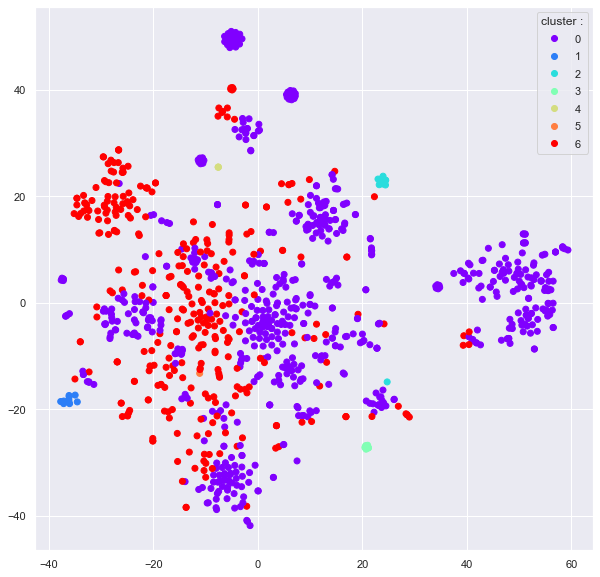

In [140]:
tsne = TSNE(n_components=2, random_state=0, init="random")#On initialise tsne 
#TSEN ne supporte pas init='pca' qd il y a trop de 0 dans les matrice matrix sparse - à remplacer par init="random"
# donne plusieurs clusters avec la même couleur

X_trans = tsne.fit_transform(X) #On initilaise les X_scaled avec la transfo tsne

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_trans[:,0], X_trans[:,1],c=labels, cmap="rainbow") #cmap lie chq chiffre à une couleur
#scatter = plt.scatter(X_trans[:,0], X_trans[:,1], cmap="rainbow") 


plt.legend(*scatter.legend_elements(), title='cluster :', loc=0)
#plt.axis('off')
plt.show()
#

Visulaiser la description avec la catégorie  d'orginee
calculer ARI entre labels et les vraies catégories

la même methode est appliquer sur le  reste

Pour le Embedding, et BERT, il faudra appliquer le word anglais
BEERT : on lui donne le document et il le transforme en vecteur


# Visualiser avec le T-SNE

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, labels)
tsne_all.show()

In [141]:
X.shape

(1050, 6043)

In [142]:
labels.shape

(1050,)

In [143]:
y = df.category.values

In [144]:
y

array(['Furnishing', 'Baby', 'Baby', ..., 'Baby', 'Baby', 'Baby'],
      dtype=object)

In [145]:
y.shape

(1050,)

In [146]:
labels

array([1, 6, 6, ..., 0, 0, 0])

In [147]:
labels.shape

(1050,)

 ## Utiliser TSVD

In [148]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

# make a synthetic dataset
#X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

# use RandomTreesEmbedding to transform data - Pas besoin de transformer
#hasher = RandomTreesEmbedding(n_estimators=10, random_state=0, max_depth=3)
#X_transformed = hasher.fit_transform(X)

X_transformed = X

# Visualize result after dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)


# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, labels)


# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)
trees.fit(X, labels)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))
'''
ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, edgecolor="k")
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor="k")
ax.set_title(
    "Truncated SVD reduction (2d) of transformed data (%dd)" % X_transformed.shape[1]
)
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color
# to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor="k")
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()
'''

'\nax = plt.subplot(221)\nax.scatter(X[:, 0], X[:, 1], c=labels, s=50, edgecolor="k")\nax.set_title("Original Data (2d)")\nax.set_xticks(())\nax.set_yticks(())\n\nax = plt.subplot(222)\nax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor="k")\nax.set_title(\n    "Truncated SVD reduction (2d) of transformed data (%dd)" % X_transformed.shape[1]\n)\nax.set_xticks(())\nax.set_yticks(())\n\n# Plot the decision in original space. For that, we will assign a color\n# to each point in the mesh [x_min, x_max]x[y_min, y_max].\nh = 0.01\nx_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5\ny_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5\nxx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))\n\n# transform grid using RandomTreesEmbedding\ntransformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])\ny_grid_pred = nb.predict_proba(transformed_grid)[:, 1]\n\nax = plt.subplot(223)\nax.set_title("Naive Bayes on Transformed data")\nax.pcolormesh(xx,

<Figure size 648x576 with 0 Axes>

In [149]:
X_reduced

array([[ 6.15072252,  3.51077055],
       [ 3.57985142,  1.57091568],
       [ 7.08736586,  3.20526417],
       ...,
       [ 1.85505625, -2.39004094],
       [ 1.94178201, -2.37309942],
       [ 1.87354241, -2.37179996]])

In [150]:
X_reduced.shape

(1050, 2)

In [151]:
X_transformed

<1050x6043 sparse matrix of type '<class 'numpy.int64'>'
	with 40786 stored elements in Compressed Sparse Row format>

In [152]:
X_reduced[:, 0]

array([6.15072252, 3.57985142, 7.08736586, ..., 1.85505625, 1.94178201,
       1.87354241])

In [153]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np
np.random.seed(0)
X_dense = X
#X_dense[:, 2 * np.arange(50)] = 0
X = csr_matrix(X_dense)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)

print(svd.explained_variance_ratio_) ### Pourcentage de variance expliquée pour chacune des composantes.

print(svd.explained_variance_ratio_.sum()) # # Les  variables cumulées représentent Somme des % de la variance expliquée

print(svd.singular_values_) #valeur sigulière

[0.02023855 0.04902873 0.0436968  0.03915925 0.02705596]
0.1791793000771238
[120.75212803  98.80807245  90.79612646  85.43891638  70.77929923]


In [154]:
## Pourcentage de variance expliquée
svd.explained_variance_ratio_ 
##nous donne le pourcentage de variance expliquée par chacune des composantes.

array([0.02023855, 0.04902873, 0.0436968 , 0.03915925, 0.02705596])

In [155]:
#Projeter les données initiales sur 2 axes
X_transformed = svd.transform(X)

In [156]:
X_transformed.shape

(1050, 5)

In [157]:
n_comp=5
svd = decomposition.PCA(n_components=n_comp) 
#pca.fit(X)

In [158]:
svd

PCA(n_components=5)

#Choix du nombre de composantes maximum à calculer pour l'ACP
n_comp=5

#Sélection des colonnes à prendre dans l'ACP - Des variables quantitatives
data_pca = mydata

#préparation des données de l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) #Remplacer les valeurs nulles par la moyenne de la variable

X = data_pca.values # On met toutes les valeurs de data_pca dans un array

#Comme l'array X ne permet pas de retenir le nom des colonnes et des lignes, on les sauvegardera dans names et features
names = data_pca.index #les intitulés 
features = data_pca.columns # Toutes les colonnes du dataframe data
#display(features)

# Centrage des données
#std_scale = preprocessing.StandardScaler().fit(X) #Fonction de centrage

# Réduction
#X_scaled = std_scale.transform(X) #fonction de réduction
#display(X_scaled)

#Calcul des composantes principales
#A l'aide de la méthode decomposition, on initialise une objet de type pca qui sera chargé de calculer la composante principale
pca = decomposition.PCA(n_components=n_comp) 
pca.fit(X)

#Diagramme Eboulis des valeurs propres avec cumul
display_scree_plot(pca)

#Cercle des corrélations
pcs = pca.components_   #On met les objets pca dans des nouvelles variables
#display(pcs)
#paramètres : pcs, nb composants, pca, nbre de plans factoriel
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))
plt.show()

In [159]:
#VT = svd.components_
#VT

AttributeError: 'PCA' object has no attribute 'components_'

In [161]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, 
                              n_components=15,
                              n_iter=5,
                              random_state=None)

In [162]:
U

array([[ 0.05093719,  0.03552881, -0.02171791, ...,  0.02791325,
         0.05219462,  0.03770522],
       [ 0.02964684,  0.01589592, -0.00944418, ..., -0.01619146,
         0.02454309,  0.00716858],
       [ 0.05869581,  0.03243259, -0.0131226 , ..., -0.09679802,
         0.07042192,  0.04526258],
       ...,
       [ 0.01536205, -0.02418784,  0.00035657, ...,  0.00141187,
         0.00174669, -0.01359525],
       [ 0.01607979, -0.02401585,  0.00020886, ...,  0.00189932,
         0.00517177, -0.02252123],
       [ 0.01551501, -0.02400315,  0.00056164, ...,  0.00258651,
         0.00242748, -0.01729752]])

In [163]:
U.shape

(1050, 15)

In [164]:
Sigma

array([120.75212803,  98.80807244,  90.79612641,  85.43891598,
        70.77927965,  69.59978903,  66.33327527,  60.72518494,
        55.69469558,  55.3728377 ,  54.03294537,  49.73312998,
        49.15190034,  47.757128  ,  44.38661796])

In [165]:
Sigma.shape

(15,)

In [166]:
VT

array([[ 3.78961623e-04,  5.27029419e-04,  5.61177201e-04, ...,
         4.27955148e-04,  2.20507331e-03,  7.81445472e-04],
       [ 2.99509389e-04, -1.13563958e-05,  2.84126904e-04, ...,
         3.97646209e-04,  1.90552542e-03, -1.63685490e-03],
       [-1.87901290e-04, -2.17148894e-04, -1.40394209e-04, ...,
         3.98582229e-04,  2.06645375e-03,  6.16217040e-05],
       ...,
       [ 6.32800150e-04, -1.26042020e-03,  4.35248037e-03, ...,
         1.04661108e-03,  2.65831607e-03,  2.06525756e-04],
       [-3.90771238e-04,  4.99198197e-06, -3.59371279e-04, ...,
         1.22596979e-03, -5.86647227e-03,  9.01809858e-04],
       [-1.16953329e-04, -1.74876255e-03,  2.93988570e-04, ...,
        -9.40298371e-04,  1.34369743e-04, -7.71818629e-04]])

In [167]:
VT.shape

(15, 6043)

In [168]:
X.shape

(1050, 6043)

### TSNE avec les vrais labels
Pas besoin de transformer la catégorie en numérique, ni recalculer le Kmeans
Pas besoin de découpage du dataset ou d'utilisation de K-means. Tu remplace directement sur le code TSNE de ce matin la variable labels (la liste des clusters produits par K-means) par le array des vrais catégories que tu récupères de ton dataframe.

In [169]:
y = df.category.values

In [170]:
y.shape

(1050,)

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

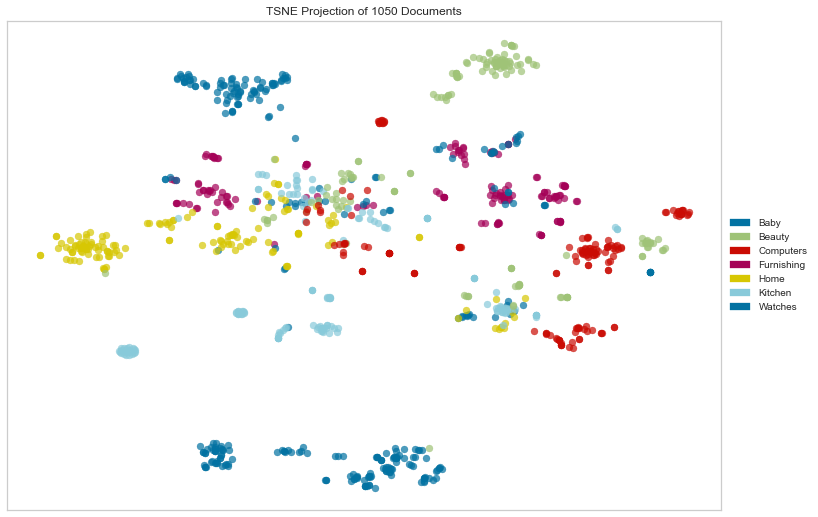

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [171]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, y)
tsne_all.show()

### Indice ARI

In [172]:
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(y, labels))

Adjusted Rand Index: 0.0434


ARI = 0.14

## TF-IDF

### TF-IDF on a Simple Corpus

In [ ]:
corpus_tf = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
X_tf = vectorizer.fit_transform(corpus_tf)

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X_tf.todense(), columns=vocab)

In [ ]:
vocab

In [ ]:
docterm

### TF-IDF on a real Corpus

In [173]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()# Tous les tokens du corpus : vocabulaire
docterm = pd.DataFrame(X.todense(), columns=vocab) #la matrice de tous les tokens représentés par des vecteurs

In [174]:
vocab

array(['00', '000', '001', ..., 'zoom', 'zora', 'zyxel'], dtype=object)

In [175]:
X

<1050x6043 sparse matrix of type '<class 'numpy.float64'>'
	with 40786 stored elements in Compressed Sparse Row format>

In [176]:
docterm.sample(10)

,00,000,001,0021,004,005,006,0083,01,011,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
# On instancie notre Kmeans avec 7 clusters : 
kmeans = KMeans(n_clusters=7)

# On l'entraine : 
kmeans.fit(X)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

array([6, 6, 6, ..., 5, 5, 5])

In [ ]:
#Faisons une PCA sur 2 composantes
#PCA does not support sparse input
#pca = PCA(n_components=2)
#pca.fit(X)

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


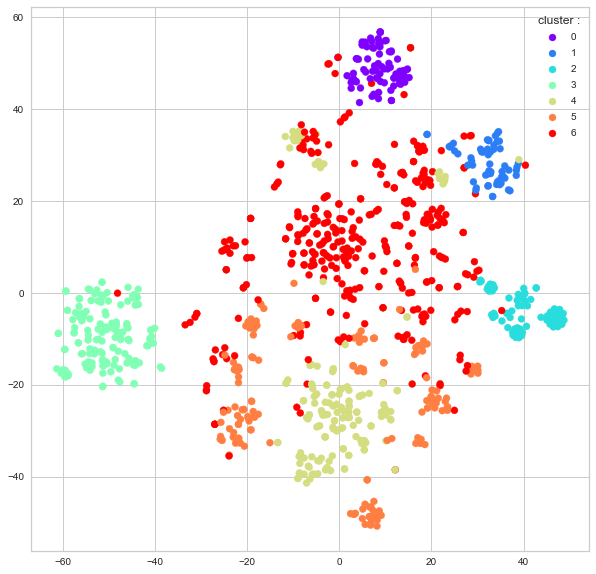

In [178]:
tsne = TSNE(n_components=2, random_state=0, init="random")#On initialise tsne - on utlise pca pour initialiser le tsne - init='pca'
#TSEN ne supporte pas init='pca' qd il y a trop de 0 dans les matrice matrix sparse - à remplacer par init="random"
# donne plusieurs clusters avec la même couleur

X_trans = tsne.fit_transform(X) #On initilaise les X_scaled avec la transfo tsne

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_trans[:,0], X_trans[:,1],c=labels, cmap="rainbow") #cmap lie chq chiffre à une couleur
#scatter = plt.scatter(X_trans[:,0], X_trans[:,1], cmap="rainbow") 


plt.legend(*scatter.legend_elements(), title='cluster :', loc=0)
#plt.axis('off')
plt.show()
#

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use th

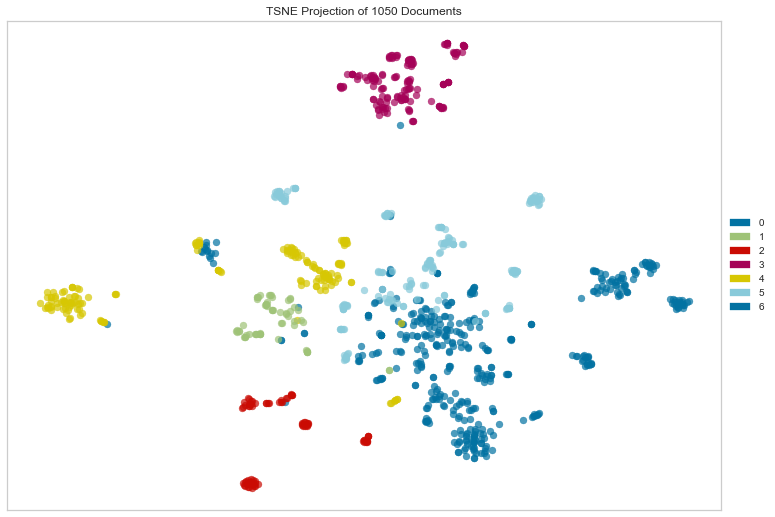

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [179]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, labels)
tsne_all.show()

On constate que les clusters se distinguent bien

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

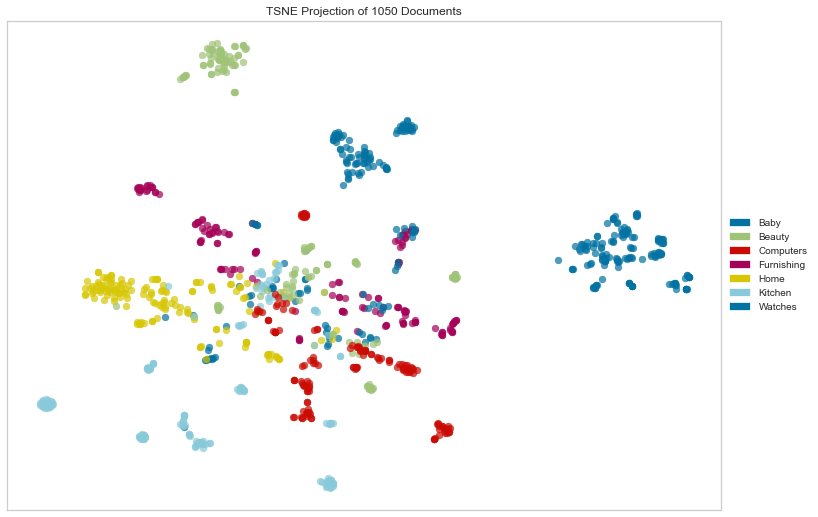

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [182]:
# Visualiser le réel avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, y)
tsne_all.show()

#### ARI

In [180]:
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(y, labels))

Adjusted Rand Index: 0.3479


ARI = 0.35

L'indice ARI 0.32 est meilleur avec tf_idf qu'avec Vectorizer

In [181]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X, y)

# 3. Make predictions
yhat = clf.predict(X)

# 4. score - % d'individus correctement prédits
print("Accuracy: ",accuracy_score(y, yhat))

Accuracy:  0.9752380952380952


## Visualiser avec le T-SNE
#très coûteux en temps

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, yhat)
tsne_all.show()

spacy
https://newreleases.io/project/github/explosion/spacy-models/release/en_core_web_lg-3.1.0

# Word Embedding
word embeddings are dense vectors. TF-IDF vectors word filled with 0.
all the elements of a word embedding vector are non-zero, except for the occasional element
They Have a Constant Vector Size
### WordtoVec
word2vec dense - dans laquelle le mot possède une représentation dans un espace qui le positionne en fonction des mots adjacents
Il existe notamment d’autres méthodes de plongement (word embeddings) tels que gloVe et FastText.
PMI (pointwise mutual information)  information mutuelle pertinente

une approche de type word/sentence embedding classique avec une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ; (ou Glove ou FastText) ;

In [183]:
df.sample(5)

,category,description,description_bow,description_bow_lem,description_dl
uniq_id,,,,,
47d7792e50e69b048b1f17176f170141,Beauty,Beverly Hills Polo Club RED Gift Set Combo Se...,beverly hills polo club red gift set combo set...,beverly hill polo club red gift set combo set ...,beverly hills polo club red gift set combo set...
141ab1fbe0f943463d4971098647000c,Beauty,Mxofere Combo Rose Jasmine Almond Honey Aloeve...,mxofere combo rose jasmine almond honey aloeve...,mxofere combo rose jasmine almond honey aloeve...,mxofere combo rose jasmine almond honey aloeve...
9d3ca83f7017d6e9e129964e88503ff0,Baby,Kushies baby Baby Girl's Shrug Specifications ...,kushies baby baby girl 's shrug specifications...,kushies baby baby girl 's shrug specification ...,kushies baby baby girl 's shrug specifications...
281dfd9b94b34362c295b3e5f8da5dfa,Computers,"Smartpro 19.5v,3.9a Replacement Charger for Va...","smartpro 19.5v,3.9a replacement charger vaio s...","smartpro 19.5v,3.9a replacement charger vaio s...","smartpro 19.5v,3.9a replacement charger for va..."
a4d9e71172f619f8e3122e34bb0bf3cc,Home,Unique Design Handcrafted Brass Mini Chair Tab...,unique design handcrafted brass mini chair tab...,unique design handcrafted brass mini chair tab...,unique design handcrafted brass mini chair tab...


In [184]:
df["description_bow_lem"] = df["description_bow_lem"].fillna("")
df["tokens"] = df["description_bow_lem"].map(lambda x: word_tokenize(x))

docs = df["description_bow_lem"].values
tokenized_docs = df["tokens"].values

In [ ]:
#docs

In [ ]:
#tokenized_docs

Changer la taille du vocabulaire vector_size
et retester - 1000 par ex
vector_size = taille du vocabulaire utilisé comme vecteurs de mots
 workers : Nb de CPU

In [185]:
#Définir le modèle avec une taille de 100 vecteurs
# Train model Word2Vec
model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=4, seed=SEED)

##  Note: use a pre-trained model
In many cases, you might want to use a pre-trained model instead of training one yourself. If that's the case, gensim provides you with an easy way to access some of the most popular pre-trained word embeddings.

In [186]:
import gensim.downloader as api
#wv = api.load("word2vec-google-news-300")
# A n'exécuter qu'une fois dans le code sinon coûteux en temps

In [187]:
model.wv.most_similar('genuine')

[('30', 0.9968716502189636),
 ('0.0', 0.9946470260620117),
 ('guarantee', 0.9915676712989807),
 ('free', 0.9914359450340271),
 ('shipping', 0.9908861517906189),
 ('on', 0.9897958040237427),
 ('day', 0.9891045093536377),
 ('product', 0.9886013865470886),
 ('cash', 0.9883133172988892),
 ('r', 0.9872252941131592)]

In [189]:
model.wv.most_similar('card')

[('system', 0.9966994524002075),
 ('modem', 0.9966437816619873),
 ('cable', 0.9963697195053101),
 ('fi', 0.9959524869918823),
 ('powered', 0.9959369897842407),
 ('oil', 0.9959173798561096),
 ('wild', 0.9958019256591797),
 ('soap', 0.9956970810890198),
 ('link', 0.9954214692115784),
 ('band', 0.9954017996788025)]

In [188]:
model.wv.most_similar('watche')

[('decker', 0.9852029085159302),
 ('timewel', 0.9849129915237427),
 ('1100', 0.9846663475036621),
 ('nc11', 0.9835089445114136),
 ('mac', 0.9832150936126709),
 ('attivo', 0.9831528067588806),
 ('plated', 0.9827923774719238),
 ('fastrack', 0.9821977019309998),
 ('rs.899', 0.9820034503936768),
 ('alfajr', 0.98183274269104)]

## Create Document Vectors from Word Embeddings
The following code will help you create a vector per document by averaging its word vector
créé un vecteur pour chauqe document en calculant la moyenne des vecteurs de ses mots

In [190]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size) #Crée un vecteur de 0 qui a la taille vector_size
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    


This code will get all the word vectors of each document and average them to generate a vector per each document. Here's what's happening there:

You define the vectorize function that takes a list of documents and a gensim model as input, and generates a feature vector per document as output.
You apply the function to the documents' tokens in tokenized_doc, using the Word2Vec model you trained earlier.
You print the length of the list of documents and the size of the generated vectors.

In [191]:
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 100)

1050 lignes et 100 colonnes qui représente les token vectorisés

In [213]:
len(vectorized_docs)

1050

In [193]:
 len(vectorized_docs[0])

100

In [194]:
vectorized_docs[:1]

[array([ 3.63649786e-01, -1.14438154e-01, -3.40256244e-01, -4.08345535e-02,
         2.03401446e-02,  5.37259355e-02,  3.91470551e-01,  3.50547969e-01,
         1.08725680e-02,  2.61299819e-01, -5.38612127e-01,  1.85389102e-01,
        -1.90637961e-01,  4.01313275e-01, -3.72522771e-01, -3.09206307e-01,
        -5.97319454e-02, -2.68346578e-01,  1.19620003e-01, -2.94078976e-01,
         5.55255115e-01,  3.81031692e-01,  3.87897603e-02,  1.95710793e-01,
        -8.21528807e-02,  5.02572581e-02, -6.29645705e-01, -8.39164406e-02,
        -2.06752330e-01, -1.91357687e-01, -4.36014026e-01, -4.36131686e-01,
         2.78169483e-01, -6.73241913e-02,  4.95981239e-02, -3.60238612e-01,
         2.33125821e-01, -1.36842370e-01,  3.24354693e-02,  2.92282254e-01,
         6.43982962e-02, -2.82139778e-01,  6.21710002e-01, -3.17540050e-01,
         6.78620785e-02,  4.79526557e-02,  2.89163411e-01,  4.31625903e-01,
         2.78437346e-01, -1.65574849e-01, -1.58919945e-01, -5.12505889e-01,
         8.6

## Cluster Documents Using (Mini-batches) K-means
To cluster the documents, you'll use the Mini-batches K-means algorithm. This K-means variant uses random input data samples to reduce the time required during training. The upside is that it shares the same objective function with the original algorithm, so, in practice, the results are just a bit worse than K-means.

In the code snippet below, you can see the function you'll use to create the clusters using Mini-batches K-means. Create a new cell in your notebook, and copy the following code there:

In [211]:
def mbkmeans_clusters(
    X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features. vectorized documents
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

This function creates the clusters using the Mini-batches K-means algorithm. It takes the following arguments:

X: Matrix of features. In this case, it's your vectorized documents.
k: Number of clusters you'd like to create.
mb: Size of mini-batches.
print_silhouette_values: Defines if the Silhouette Coefficient is printed for each cluster. If you haven't heard about this coefficient, don't worry, you'll learn about it in a bit!
mbkmeans_cluster takes these arguments and returns the fitted clustering model and the labels for each document.

Run the cell where you copied the function. Next, you'll apply this function to your vectorized documents.

## Definition of Clusters
Now, you need to execute mbkmean_clusters providing it with the vectorized documents and the number of clusters. You'll print the Silhouette Coefficients per cluster to review the quality of your clusters.
Coef silhouette : une autre façon de quantifier à quel point un clustering répond à ces deux exigences (homogénéité et séparation) est de mesurer ce que l'on appelle le coefficient de silhouette

Silhouette coefficient: 0.44
Inertia:284.0480176424607

In [212]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=7,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 7
Silhouette coefficient: 0.44
Inertia:465.85719906088866
Silhouette values:
    Cluster 0: Size:130 | Avg:0.72 | Min:0.08 | Max: 0.81
    Cluster 6: Size:44 | Avg:0.59 | Min:0.09 | Max: 0.70
    Cluster 3: Size:90 | Avg:0.45 | Min:-0.02 | Max: 0.62
    Cluster 2: Size:259 | Avg:0.44 | Min:-0.03 | Max: 0.63
    Cluster 1: Size:214 | Avg:0.39 | Min:-0.07 | Max: 0.60
    Cluster 5: Size:174 | Avg:0.37 | Min:0.03 | Max: 0.56
    Cluster 4: Size:139 | Avg:0.32 | Min:-0.06 | Max: 0.55


For n_clusters = 7
Silhouette coefficient: 0.50
Inertia:298

In [197]:
print("Most representative terms per cluster (based on centroids):")
for i in range(7):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: 26cm small aluminium non storage 
Cluster 1: 30 genuine lowest guarantee shipping 
Cluster 2: rs.550 rs.795 310 rs.995 bk 
Cluster 3: striped jumpsuit solid trouser cargo 
Cluster 4: lowest 399 kadhai 30 usb 
Cluster 5: shelf body shade age glove 
Cluster 6: enjoy morning fantastic huge birthday 


In [198]:
cluster_labels

array([5, 5, 5, ..., 4, 4, 4])

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

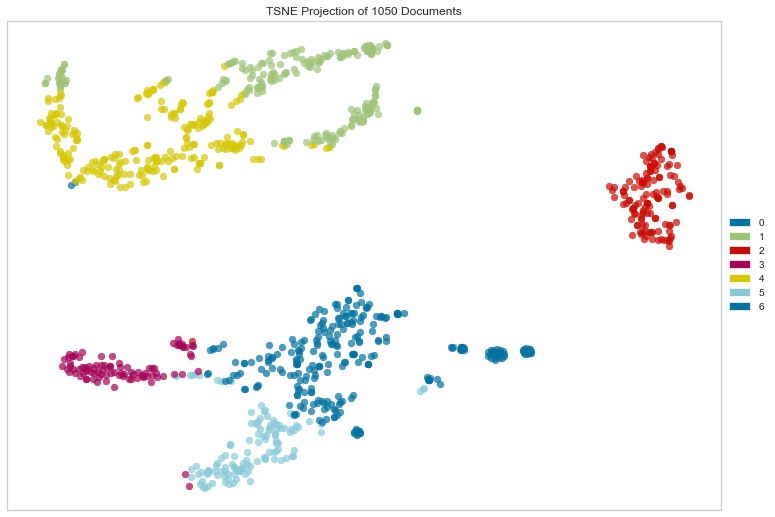

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [199]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(vectorized_docs, cluster_labels)
tsne_all.show()

Avec WordtoVec, on constate 3 à 4 clusters qui sont bien ditincts

## Objectifs du 15/02
Attention : La façon dont a fait nos classes peut-etre ça a des biais intrinsèques pr/ au réél. Le 6 classes est ce que la façon de travailler les données ou 
Il faut boucler la partie NLP
Grandes lignes OK

Partie 1 :
comment on peut améliorer avec PCA ou TSTD 
Regadrer la version supervisée
Random Forest
finir cette partie

Partie 2: 
Faire la matrice de confusion
Vérifier si des confusions de classe
Utiliser POS
Lemaatizer Spacy

Note book le plus propre sur le EMbedding/ Vérfier si un gain significatif 
fct de transo de texte en un vecteur

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

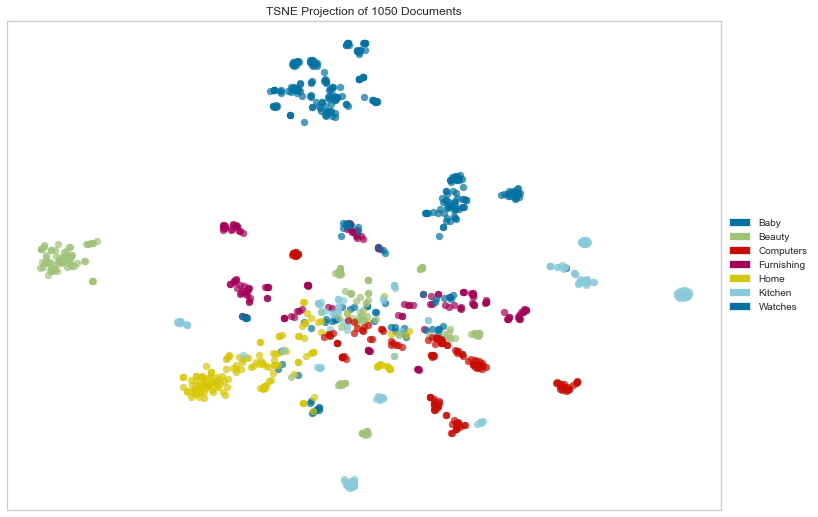

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [200]:
# Visualiser avec le réel avec T-SNE

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, y)
tsne_all.show()

In [217]:
# Pour calculer le ARI, le nb de lignes doit être identique entre les 2 target ou labels (réel et celui prédit
# Il faut supprimer les doublons dans le dataset initial
# Nb de lignes 1040. Or le dataset iitial en contient 1050. 10 doublons ont été supprimés
#
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(y, cluster_labels))

Adjusted Rand Index: 0.1923


ARI =0.20 moins performant que TF-IDF
Il y a un pb à analyser
A priori ARI doit être en 35 et 40
Word Embedding 

## Spacy Word2Vect avec le modèle : en_core_web_lg
utiliser le modèle  en_core_web_lg de la librairie Spacy
envoie un vecteur de dimension 300

In [201]:
import spacy
nlp = spacy.load("en_core_web_lg") #Modèle spacy named entity

In [202]:
#Fonction qui vectorise le texte et renvoie un vecteur
def vectorize_text(Series):
    vectors = [nlp(doc).vector for doc in Series]
    return pd.DataFrame(vectors)

In [203]:
corpus

array(['elegance polyester multicolor abstract eyelet door curtain key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain 213 cm height pack price rs 899 this curtain enhances look interiors.this curtain made 100 high quality polyester fabric.it features eyelet style stitch metal ring.it makes room environment romantic loving.this curtain ant wrinkle anti shrinkage elegant apparance.give home bright modernistic appeal designs the surreal attention sure steal hearts these contemporary eyelet valance curtains slide smoothly draw apart first thing morning welcome bright sun rays want wish good morning whole world draw close evening create special moments joyous beauty given soothing prints bring home elegant curtain softly filters light room get right amount sunlight. specifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack general brand elegance designed for door

In [205]:
len(docs)

1050

In [ ]:
#tokenized_docs

In [214]:
df_vector =  vectorize_text(docs)

In [215]:
df_vector

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.542100,0.806717,-1.813827,0.823874,1.863915,-0.468054,1.522098,3.321041,-2.760125,0.649044,...,0.143116,0.478309,1.662666,-0.759214,-1.012676,0.324841,0.674305,-1.000709,-1.996796,0.288372
1,-2.238352,0.351439,-1.942577,0.973087,1.251072,-1.592162,0.441796,2.791656,-2.444921,0.953703,...,-0.101532,0.938426,1.908585,-0.274373,-1.782189,1.125849,1.230636,-0.421037,-0.314174,0.323642
2,-1.534817,0.302534,-2.291991,0.773656,1.743425,-1.312633,1.126360,3.506028,-2.214778,0.221207,...,-0.200243,0.304647,1.128124,-0.338471,-1.307672,0.125565,0.961127,-0.677731,-0.444729,0.482833
3,-2.615892,0.404086,-2.782400,1.456382,1.618498,-1.307736,0.988926,4.215473,-2.717634,0.637046,...,0.031305,0.828170,0.417512,0.266849,-0.561450,1.614625,0.849902,-1.902364,-0.866754,0.356017
4,-2.358341,0.123366,-3.190724,1.506679,1.664609,-1.286555,1.343892,4.167754,-2.901548,0.586641,...,0.058917,0.574677,1.073134,-0.083096,-1.115708,1.394260,0.329274,-1.537560,-1.237514,0.357553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.451433,1.094611,-2.879843,0.395385,0.829353,-1.171361,1.342465,2.833323,-2.916513,1.358482,...,0.239963,-0.519639,1.856275,-0.535187,-1.811062,0.231288,0.061798,-0.030797,-1.886413,-0.476661
1046,-0.887682,1.336881,-2.778424,0.911960,1.729266,0.016319,0.815339,3.036571,-3.409832,0.519225,...,0.228174,-0.296856,1.261589,0.153488,-1.012629,-0.080998,0.234738,-1.347104,-2.197983,-0.136608
1047,-2.088611,-0.757765,-2.096463,0.465112,2.109611,-1.210463,2.406971,2.651406,-1.449444,-0.946389,...,-0.809892,-1.758762,1.495271,-0.122583,-2.608790,1.200370,1.165700,-0.656200,-2.314431,-0.364905
1048,-1.662023,-0.181467,-2.484498,1.264130,1.279211,-0.852147,1.937141,1.239353,-1.928302,-0.799517,...,-0.802885,-0.586968,1.334978,-0.043596,-1.960772,1.108155,0.394569,-0.470112,-1.657338,-0.764467


In [ ]:
docs

In [216]:
clustering, cluster_labels = mbkmeans_clusters(
	X=df_vector,
    k=7,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 7
Silhouette coefficient: 0.14
Inertia:107943.4296875
Silhouette values:
    Cluster 0: Size:88 | Avg:0.30 | Min:0.05 | Max: 0.41
    Cluster 6: Size:400 | Avg:0.19 | Min:0.05 | Max: 0.28
    Cluster 4: Size:101 | Avg:0.19 | Min:-0.01 | Max: 0.35
    Cluster 2: Size:221 | Avg:0.08 | Min:-0.09 | Max: 0.21
    Cluster 3: Size:63 | Avg:0.07 | Min:-0.12 | Max: 0.29
    Cluster 5: Size:78 | Avg:0.06 | Min:-0.14 | Max: 0.17
    Cluster 1: Size:99 | Avg:0.05 | Min:-0.07 | Max: 0.15


In [ ]:
df_clusters

In [218]:
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(y, cluster_labels))

Adjusted Rand Index: 0.1923


ARI = 0.22
Il doit être entre 30 et 40

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

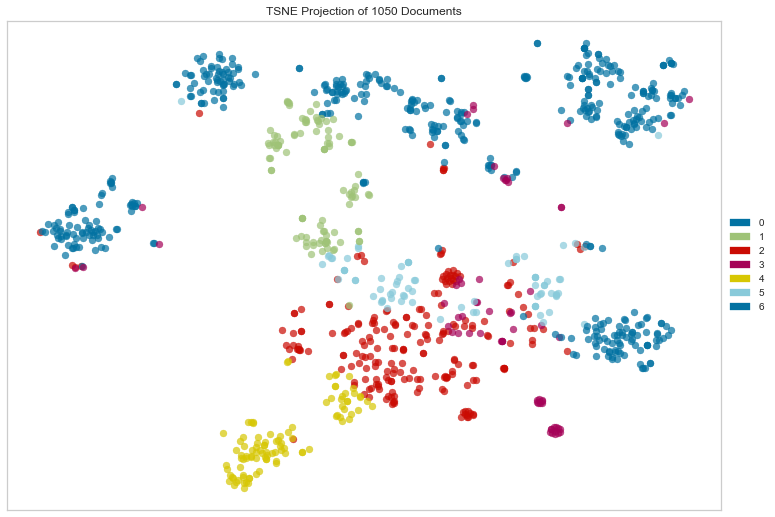

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [221]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(df_vector, cluster_labels)
tsne_all.show()

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

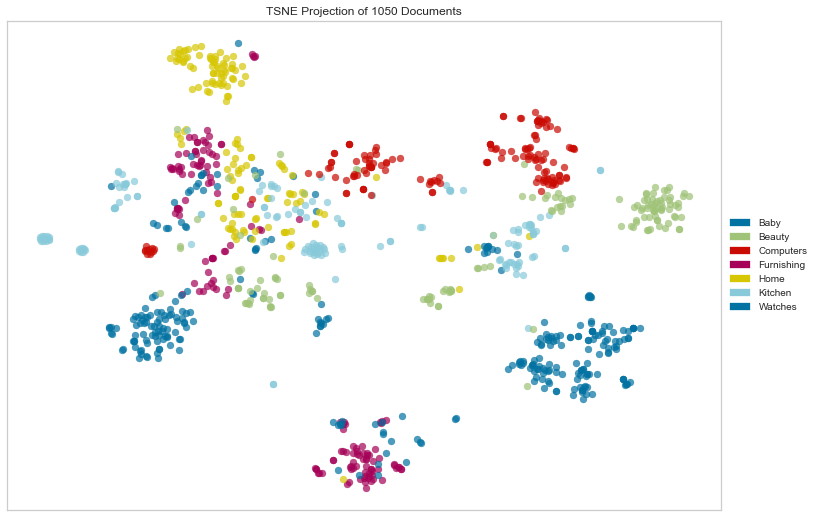

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [222]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(df_vector, y)
tsne_all.show()

## Objectifs 10/02

Afficher le TSNE avec le catégories réelles de chq modèle. Cf ci-dessous
2- BERT APpliquer l'exemle de AMine

3- Utliser une autre moèle Univesal sentence encoder de Google https://tfhub.dev/google/universal-sentence-encoder/4

4- Images 2 méthode
SIFT
transfer Leaning
A télécharer et à utliser sur les images

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

# The following are example embedding output of 512 dimensions per sentence
# Embedding for: The quick brown fox jumps over the lazy dog.
# [-0.03133016 -0.06338634 -0.01607501, ...]
# Embedding for: I am a sentence for which I would like to get its embedding.
# [0.05080863 -0.0165243   0.01573782, ...]

In [ ]:
## A
Afficher le TSNE avec les vraies lables

## Word2Vect : modifier la taille du vocalbulaire : vector_size

In [223]:
#Définir le modèle avec une taille de 200, 500 et 1000 vecteurs
model = Word2Vec(sentences=tokenized_docs, vector_size=500, workers=6, seed=SEED)

In [224]:
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 500)

In [225]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=7,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 7
Silhouette coefficient: 0.41
Inertia:374.2046850729433
Silhouette values:
    Cluster 2: Size:130 | Avg:0.73 | Min:0.07 | Max: 0.82
    Cluster 4: Size:87 | Avg:0.46 | Min:0.01 | Max: 0.62
    Cluster 1: Size:183 | Avg:0.39 | Min:0.04 | Max: 0.59
    Cluster 6: Size:166 | Avg:0.38 | Min:-0.02 | Max: 0.60
    Cluster 5: Size:143 | Avg:0.38 | Min:0.05 | Max: 0.59
    Cluster 0: Size:255 | Avg:0.34 | Min:-0.07 | Max: 0.53
    Cluster 3: Size:86 | Avg:0.29 | Min:-0.11 | Max: 0.52


C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

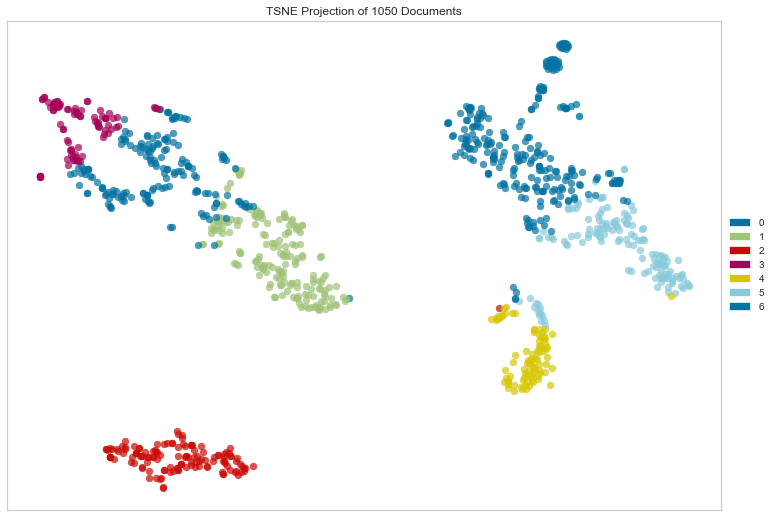

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [226]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(vectorized_docs, cluster_labels)
tsne_all.show()

In [231]:
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(y, cluster_labels))

Adjusted Rand Index: 0.2035


Avec vector_size = 500, le ARI ne change pas p/r à vector_size = 300

In [232]:
#Définir le modèle avec une taille de 200, 500 et 1000 vecteurs
model = Word2Vec(sentences=tokenized_docs, vector_size=1000, workers=6, seed=SEED)

In [233]:
vectorized_docs = vectorize(tokenized_docs, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1050, 1000)

In [234]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=7,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


For n_clusters = 7
Silhouette coefficient: 0.42
Inertia:345.05001248307224
Silhouette values:
    Cluster 4: Size:129 | Avg:0.74 | Min:0.09 | Max: 0.82
    Cluster 0: Size:87 | Avg:0.42 | Min:-0.03 | Max: 0.60
    Cluster 5: Size:122 | Avg:0.42 | Min:0.06 | Max: 0.62
    Cluster 1: Size:192 | Avg:0.38 | Min:-0.06 | Max: 0.62
    Cluster 3: Size:273 | Avg:0.38 | Min:-0.09 | Max: 0.58
    Cluster 6: Size:72 | Avg:0.37 | Min:0.04 | Max: 0.57
    Cluster 2: Size:175 | Avg:0.31 | Min:-0.13 | Max: 0.55


C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ADSL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*

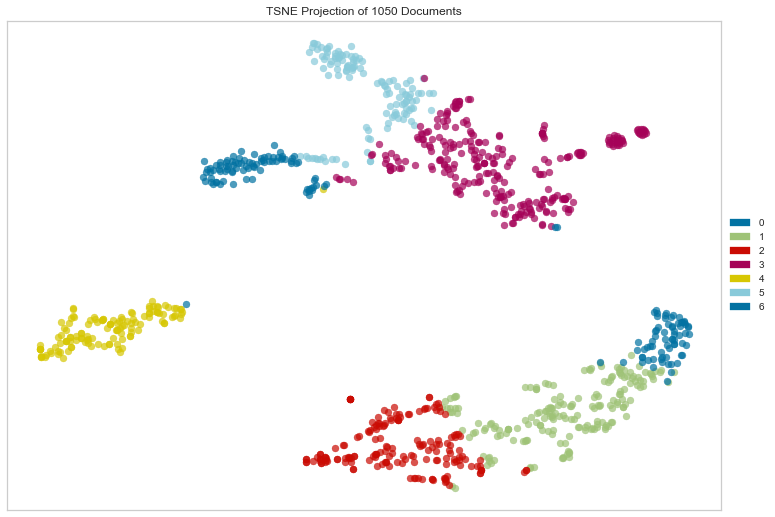

<AxesSubplot:title={'center':'TSNE Projection of 1050 Documents'}>

In [235]:
# Visualiser avec le T-SNE
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(vectorized_docs, cluster_labels)
tsne_all.show()

In [236]:
print("Adjusted Rand Index: %0.4f" % metrics.adjusted_rand_score(y, cluster_labels))

Adjusted Rand Index: 0.1992


AR= 0.20. En variant la taille des vecteurs vector_size, on constate un résultat avec une légère baisse

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

# apply the vectorizer to the corpus
X = tf_vectorizer.fit_transform(corpus)

tf = tf_vectorizer.fit_transform(documents)

Une représentation type word2vec dense - dans laquelle le mot possède une représentation dans un espace qui le positionne en fonction des mots adjacents

In [ ]:
# Visualiser avec le T-SNE
#récuperer les vrais labels et relancer
#Comparer les 2 TSNE 
# Utliser le ARI pour comperer les vrais labels et les labels
import matplotlib.pyplot as plt

from yellowbrick.text import TSNEVisualizer

fig=plt.figure(figsize=(16, 9))

tsne_all = TSNEVisualizer()
tsne_all.fit(X, labels)
tsne_all.show()

In [ ]:
vectorizer2
##X2 = vectorizer2.fit_transform(corpus)